In [1]:
from src.parsers import mimic, hirid
from src.modeling import discovery, plots, querier, plots_v2 as plots_module
from src.utils import constants

In [2]:
import sys
# import win32com.client
import os
import pandas as pd

def setup_io_config(root_path):
    """
    Input - Output config. Add dataset paths
    :root_path -> Repo path which contains 'data' and 'res' folders
    """

    # MIMIC
    is_shortcut = True if "data.lnk" in os.listdir(root_path) else False 
    
    if (is_shortcut):
        path_shortcut =  os.path.join(root_path, "data.lnk")
        shell = win32com.client.Dispatch("WScript.Shell")
        mimic_data = shell.CreateShortCut(path_shortcut).Targetpath
    else:
        mimic_data = os.path.join(f"{root_path}", "data") 
    mimic_path = os.path.join(f"{root_path}", "results")

    # HIRID
    hirid_data = f'{root_path}/data/hirid-a-high-time-resolution-icu-dataset-1.1.1/raw_stage/'
    hirid_path = f'{root_path}/data/hirid-a-high-time-resolution-icu-dataset-1.1.1'
    
    return mimic_data, mimic_path, hirid_data, hirid_path

def setup_stratification_config():
    gender="MF"
    age_b=40
    age_a=80 
    ethnicity="WHITE" 
    lab_mapping= constants.LAB_MAPPING
    before_windows = [(0,6), (6,12)]
    after_windows = [(0,4), (4,8), (8,12)]
    return gender, age_a, age_b, ethnicity, lab_mapping, before_windows, after_windows

In [3]:
# IO Config
# root_path ="C:\\Users\\danco\\My Drive\\Master\\Datasets\\hirid iii"
root_path = "/Users/pavan/Library/CloudStorage/GoogleDrive-f20190038@hyderabad.bits-pilani.ac.in/My Drive/TAU/Code/DrugLab"
data, res, raw_path, res_path = setup_io_config(root_path=root_path)

# Stratification Config
gender, age_a, age_b, ethnicity, lab_mapping, before_windows, after_windows = setup_stratification_config()

### Load Data (Inhuman Values MIMIC and HIRID Extracts)

In [34]:
# med_lab_pairs = pd.read_csv(os.path.join(res_path, "before_after_windows_main_med_lab_trends_first_val_40-80_MF_WHITE_doc_eval_win_(10, 20).csv")).drop(columns=["Unnamed: 0"])
# med_lab_pairs["LAB_NAME"] = med_lab_pairs.LAB_NAME.str.replace("Hemoglobin [Mass/volume] in Arterial blood","Hemoglobin [Mass/volume] in Blood")

In [35]:
hirid_extract = pd.read_csv(os.path.join(res_path, "hirid_extract_with_labels_48_all_parts_new.csv")).drop(columns=["Unnamed: 0"])

In [36]:
mimic_extract = pd.read_csv(os.path.join("/Users/pavan/Downloads/df_not_imputed (1).csv")).drop(columns=["Unnamed: 0"])

In [37]:
mimic_extract

,charttime,subject_id,icustay_id,hadm_id,Heart Rate,Respiratory rate,Oxygen saturation,Systolic blood pressure,Diastolic blood pressure,Temperature,...,Mean corpuscular volume,Lymphocytes,Neutrophils,Prothrombin time INR,DEATHTIME,DISCHTIME,ADMITTIME,ETHNICITY,GENDER,age
0,2100-06-08 23:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,16.4,74.6,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
1,2100-06-09 00:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
2,2100-06-09 01:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
3,2100-06-09 02:00:00+00:00,29156,293407,161773,106.000000,11.000000,100.000000,142.0,67.0,36.499999,...,NaN,NaN,NaN,NaN,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
4,2100-06-09 03:00:00+00:00,29156,293407,161773,114.000000,24.000000,100.000000,138.0,73.0,NaN,...,98.0,2.0,96.9,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868426,2205-10-28 06:00:00+00:00,86042,255110,191143,108.000000,23.000000,99.000000,111.5,47.5,NaN,...,NaN,NaN,NaN,NaN,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868427,2205-10-28 07:00:00+00:00,86042,255110,191143,112.000000,18.000000,100.000000,88.5,45.5,NaN,...,NaN,NaN,NaN,NaN,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868428,2205-10-28 08:00:00+00:00,86042,255110,191143,116.333333,26.333333,89.333333,105.0,53.0,NaN,...,NaN,NaN,NaN,NaN,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868429,2205-10-28 09:00:00+00:00,86042,255110,191143,116.500000,22.500000,87.666667,93.5,46.0,NaN,...,NaN,NaN,NaN,NaN,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47


In [38]:
hirid_extract

,HADM_ID,AGE,GENDER,DATE,HOUR,Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin [Mass/volume] in Serum or Plasma,Amylase [Enzymatic activity/volume] in Serum or Plasma,Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Bicarbonate [Moles/volume] in Arterial blood,...,Potassium [Moles/volume] in Blood,Pulmonary artery diastolic pressure,Pulmonary artery systolic pressure,Respiratory rate,Sodium [Moles/volume] in Blood,Systolic arterial pressure,EST_DISCHTIME,CHARTTIME,discharge_status,LABEL_48
0,148,50,M,2183-05-12,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,31.0,NaN,155.111111,2183-05-14 01:31:10.010,2183-05-12 12:00:00,alive,0
1,148,50,M,2183-05-12,13,NaN,NaN,NaN,NaN,23.6,...,4.3,NaN,NaN,28.0,136.0,99.000000,2183-05-14 01:31:10.010,2183-05-12 13:00:00,alive,0
2,148,50,M,2183-05-12,14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,81.160714,2183-05-14 01:31:10.010,2183-05-12 14:00:00,alive,0
3,148,50,M,2183-05-12,15,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,78.111111,2183-05-14 01:31:10.010,2183-05-12 15:00:00,alive,0
4,148,50,M,2183-05-12,16,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.0,NaN,81.689655,2183-05-14 01:31:10.010,2183-05-12 16:00:00,alive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600127,33902,75,F,2182-12-13,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.193548,2182-12-14 04:52:14.430,2182-12-13 09:00:00,alive,0
1600128,33902,75,F,2182-12-13,10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,25.0,NaN,88.548387,2182-12-14 04:52:14.430,2182-12-13 10:00:00,alive,0
1600129,33902,75,F,2182-12-13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,81.655172,2182-12-14 04:52:14.430,2182-12-13 11:00:00,alive,0
1600130,33902,75,F,2182-12-13,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,85.208333,2182-12-14 04:52:14.430,2182-12-13 12:00:00,alive,0


In [39]:
df_inhuman = pd.read_csv("temp_mapping_140722_partial.csv", encoding= 'unicode_escape')

### OLd Plotting Function

In [ ]:
plotter = plots_module.ClinicalPlotsAnalysis(data, res, med_lab_pairs, plot_dir="plots", gender="MF", age_b=0, age_a=100, ethnicity="WHITE", lab_mapping=None)

In [ ]:
#params
med_name = 'Insulin - Regular'
lab_name = 'Glucose'
start_time_before = 4 #hours
start_time_after = 8 #hours
min_interval_between_tests = 1 #hour
min_human = 20
max_human = 1000

In [ ]:
plotter.plot_med_lab(
    med_name, 
    lab_name, 
    start_time_before=start_time_before, 
    start_time_after=start_time_after, 
    min_interval_between_tests=min_interval_between_tests, 
    min_human=min_human, max_human=max_human
)

<Figure size 1800x900 with 0 Axes>

In [ ]:
plotter.plot_reg(
    med_name, 
    lab_name, 
    start_time_before=start_time_before, 
    start_time_after=start_time_after, 
    min_interval_between_tests=min_interval_between_tests, 
    min_human=min_human, max_human=max_human
)

<Figure size 600x600 with 0 Axes>

In [ ]:
plotter.plot_all(
    start_time_before=start_time_before, 
    start_time_after=start_time_after, 
    min_interval_between_tests=min_interval_between_tests, 
    min_human=min_human, max_human=max_human
)

No Data for ACD-A Citrate (1000ml)<>Albumin pair
No Data for ACD-A Citrate (1000ml)<>Albumin pair
No Data for ACD-A Citrate (1000ml)<>Amylase pair
No Data for ACD-A Citrate (1000ml)<>Amylase pair
No Data for ACD-A Citrate (1000ml)<>Bilirubin pair
No Data for ACD-A Citrate (1000ml)<>Bilirubin pair
No Data for ACD-A Citrate (1000ml)<>Calcium pair
No Data for ACD-A Citrate (1000ml)<>Calcium pair
No Data for ACD-A Citrate (1000ml)<>Calcium ionized pair
No Data for ACD-A Citrate (1000ml)<>Calcium ionized pair
No Data for ACD-A Citrate (1000ml)<>Creatinine pair
No Data for ACD-A Citrate (1000ml)<>Creatinine pair
No Data for ACD-A Citrate (1000ml)<>Hemoglobin pair
No Data for ACD-A Citrate (1000ml)<>Hemoglobin pair
No Data for ACD-A Citrate (1000ml)<>Lactic acid pair
No Data for ACD-A Citrate (1000ml)<>Lactic acid pair
No Data for ACD-A Citrate (1000ml)<>Lipase pair
No Data for ACD-A Citrate (1000ml)<>Lipase pair
No Data for ACD-A Citrate (1000ml)<>Magnesium pair
No Data for ACD-A Citrate (10

/Users/pavan/Desktop/TAU/DrugLab/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


No Data for Acetaminophen-IV<>Hemoglobin pair
No Data for Acetaminophen-IV<>Hemoglobin pair
No Data for Acetaminophen-IV<>Hemoglobin percent pair
No Data for Acetaminophen-IV<>Hemoglobin percent pair
No Data for Acetaminophen-IV<>Lactic acid pair
No Data for Acetaminophen-IV<>Lactic acid pair
No Data for Acetaminophen-IV<>Lipase pair
No Data for Acetaminophen-IV<>Lipase pair
No Data for Acetaminophen-IV<>Magnesium pair
No Data for Acetaminophen-IV<>Magnesium pair
No Data for Acetaminophen-IV<>Potassium pair
No Data for Acetaminophen-IV<>Potassium pair
No Data for Acetaminophen-IV<>Prothrombin time INR pair
No Data for Acetaminophen-IV<>Prothrombin time INR pair
No Data for Acetaminophen-IV<>Red blood cell pair
No Data for Acetaminophen-IV<>Red blood cell pair
No Data for Acetaminophen-IV<>Uric Acid pair
No Data for Acetaminophen-IV<>Uric Acid pair
No Data for Acetaminophen-IV<>Vitamin B12 pair
No Data for Acetaminophen-IV<>Vitamin B12 pair
No Data for Acyclovir<>Albumin pair
No Data fo

/Users/pavan/Desktop/TAU/DrugLab/venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


No Data for Boost Glucose Control (Full)<>Potassium pair
No Data for Boost Glucose Control (Full)<>Potassium pair
No Data for Boost Glucose Control (Full)<>Prothrombin time INR pair
No Data for Boost Glucose Control (Full)<>Prothrombin time INR pair
No Data for Boost Glucose Control (Full)<>Red blood cell pair
No Data for Boost Glucose Control (Full)<>Red blood cell pair
No Data for Boost Glucose Control (Full)<>Uric Acid, Urine pair
No Data for Boost Glucose Control (Full)<>Uric Acid, Urine pair
No Data for Calcium Gluconate<>Albumin pair
No Data for Calcium Gluconate<>Albumin pair
No Data for Calcium Gluconate<>Calcium pair
No Data for Calcium Gluconate<>Calcium pair
No Data for Calcium Gluconate<>Calcium ionized pair
No Data for Calcium Gluconate<>Calcium ionized pair
No Data for Calcium Gluconate<>Creatinine pair
No Data for Calcium Gluconate<>Creatinine pair
No Data for Calcium Gluconate<>Hemoglobin pair
No Data for Calcium Gluconate<>Hemoglobin pair
No Data for Calcium Gluconate<

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 1800x900 with 0 Axes>

### GAM Plots

In [467]:
hirid_to_mimic_unit_conversion = constants.HIRID_TO_MIMIC_CONV

In [605]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from pygam import ExpectileGAM

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

def query(med_lab_pairs, med, lab, b_w, a_w):
    pairs = med_lab_pairs[(med_lab_pairs["LAB_NAME"]==lab) & (med_lab_pairs["MED_NAME"]==med)]
    all_types = set(["abs", "mean", "std", "trends", "time"])
    cols_b = [f"before_{t}_{b_w}_sp" for t in all_types]
    cols_a = [f"after_{t}_{a_w}_sp" for t in all_types]
    cols = cols_b.copy()
    cols.extend(cols_a)
    return pairs[['HADM_ID', 'OldITEMID', 'STARTTIME', 'ENDTIME', 'givendose',
       'cumulativedose', 'fluidamount_calc', 'cumulfluidamount_calc',
       'doseunit', 'route', 'infusionid', 'typeid', 'subtypeid',
       'recordstatus', 'Source Table', 'MED_NAME', 'Unit',
       'Additional information', 'ADMITTIME', 'GENDER', 'AGE',
       'discharge_status', 'MedTimeFromAdmit', 'hours_in', 'LAB_NAME']+cols]
    
def exponent_gam_plot(x,y,lab_name,med_t_name, mimic_lab_name=""):
    plt.title(lab_name+" & "+med_t_name)

    ## Exponent ##
    xs = np.array(x)
    ys = np.array(y)

    # perform the expnonent fit
    p0 = (.1, .1, 10) # start with values near those we expect
    exp_params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
    m, t, b = exp_params
    print(f"Y = {m} * e^(-{t} * x) + {b}")

    # determine quality of the fit
    squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
    squaredDiffsFromMean = np.square(ys - np.mean(ys))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    print(f"R² = {rSquared}")

    ## GAM ##
    X_gam = np.array([[i] for i in list(x)])
    y_gam =  pd.DataFrame(y)

    # lets fit the mean model first by CV
    gam50 = ExpectileGAM(expectile=0.5).gridsearch(X_gam, y_gam)

    # plot the results
    plt.plot(xs, ys, '.')

    #plot exponent
    x_axis_values = np.linspace(min(xs), max(xs), num=500)
    plt.plot(x_axis_values, monoExp(x_axis_values, m, t, b), '--', label="Exponent")

    #plot GAM
    data_points_gam = gam50.generate_X_grid(term=0, n=500)
    plt.plot(data_points_gam, gam50.predict(data_points_gam), label='GAM')

    plt.legend()
    plt.axhline(y = 1, color = 'r', linestyle = '-')
    plt.xlabel("Hours since "+med_t_name+ " adminstration")
    plt.ylabel('Ratio of ' + lab_name)
    plt.savefig(os.path.join("/Users/pavan/Desktop/TAU/DrugLab", "plots/gam", 'plot_'+mimic_lab_name+'_'+med_t_name+'.jpeg'))
    plt.clf()
    # inspect the parameters

    return(exp_params,gam50)

def extract_ratio_and_after_time(df_drug_lab, min_val, max_val, delta_time_before, delta_time_after, a_w=(0,4), b_w=(0,6), conversion_factor=1):
    
    # # Unit conversion
    # all_types = set(["abs", "mean", "std"])
    # cols_b = [f"before_{t}_{b_w}_sp" for t in all_types]
    # cols_a = [f"after_{t}_{a_w}_sp" for t in all_types]
    # cols = cols_b.copy()
    # cols.extend(cols_a)
    # df_drug_lab[cols] = df_drug_lab[cols] * conversion_factor
    
    
    # print("Before inhuman values filter : ", df_drug_lab.shape)
    
    # # remove inhuman values
    # df_drug_lab = df_drug_lab[df_drug_lab[f'after_abs_{a_w}_sp'] > min_val]
    # df_drug_lab = df_drug_lab[df_drug_lab[f'before_abs_{b_w}_sp'] > min_val]
    # df_drug_lab = df_drug_lab[df_drug_lab[f'after_abs_{a_w}_sp'] < max_val]
    # df_drug_lab = df_drug_lab[df_drug_lab[f'before_abs_{b_w}_sp'] < max_val]
    
    print("After inhuman values filter : ", df_drug_lab.shape)

    # # take data only according to time windows
    # df_drug_lab = df_drug_lab[df_drug_lab[f'before_time_{b_w}_sp'] <= int(delta_time_before[0])]
    # df_drug_lab = df_drug_lab[df_drug_lab[f'after_time_{a_w}_sp'] <= int(delta_time_after[0])]

    #calculate ratio
    df_drug_lab['ratio'] = df_drug_lab[f'after_abs_{a_w}_sp']/df_drug_lab[f'before_abs_{b_w}_sp']

    #remove ratio == 1 because of lab_events and chartevents bug
    #df_drug_lab = df_drug_lab[df_drug_lab['ratio'] != 1]

    #remove rows where one of the values is mising
    df_drug_lab = df_drug_lab[~df_drug_lab['ratio'].isna()]
    df_drug_lab = df_drug_lab[~df_drug_lab['ratio'].isna()]
    print(df_drug_lab.shape)

    #define vectors for GAM calculation
    x = df_drug_lab[f'after_time_{a_w}_sp']
    y = df_drug_lab['ratio']
    return x, y

# https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html
def calc_gam_func(x,y,lab_name,med_t_name,mimic_lab_name=""):
    X = np.array([[i] for i in list(x)])
    y =  pd.DataFrame(y)

    # lets fit the mean model first by CV
    gam50 = ExpectileGAM(expectile=0.5).gridsearch(X, y)

    XX = gam50.generate_X_grid(term=0, n=500)
    plt.title('GAM')
    plt.scatter(X, y, c='k', alpha=0.2)
    plt.xlabel("Hours since "+med_t_name+ " adminstration")
    plt.ylabel(lab_name)
    plt.plot(XX, gam50.predict(XX), label='GAM')
    plt.legend()
    plt.savefig(os.path.join("/Users/pavan/Desktop/TAU/DrugLab", "plots/gam", 'gam_'+mimic_lab_name+'_'+med_t_name+'.jpeg'))
    plt.clf()
    print('GAM was created')
    return(gam50)

    return(x,y)

def calc_exponent_func(x,y,lab_name,med_t_name,mimic_lab_name=""):
    xs = np.array(x)
    ys = np.array(y)

    plt.plot(xs, ys, '.')
    plt.title("Original Data")

    # perform the fit
    p0 = (.1, .1, 10) # start with values near those we expect
    params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
    m, t, b = params
    sampleRate = 20_000 # Hz
    tauSec = (1 / t) / sampleRate

    # determine quality of the fit
    squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
    squaredDiffsFromMean = np.square(ys - np.mean(ys))
    rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
    print(f"R² = {rSquared}")

    # plot the results
    plt.plot(xs, ys, '.', label="data")
    x_axis_values = np.linspace(min(xs), max(xs), num=500)
    plt.plot(x_axis_values, monoExp(x_axis_values, m, t, b), '--', label="exponent")
    plt.title("Fitted Exponential Curve "+f"\n R² = {round(rSquared,3)}" + (f" | Y = {round(m,3)} * e^(-{round(t,3)} * x) + {round(b,3)}"))
    plt.legend()
    plt.xlabel("Hours since "+med_t_name+ " adminstration")
    plt.ylabel('Ratio of ' + lab_name)
    plt.savefig(os.path.join("/Users/pavan/Desktop/TAU/DrugLab", "plots/gam", 'exponential_'+mimic_lab_name+'_'+med_t_name+'.jpeg'))
    plt.clf()
    # inspect the parameters
    print(f"Y = {m} * e^(-{t} * x) + {b}")
    print(f"Tau = {tauSec * 1e6} µs")

    return(params)

In [606]:

def create_gum_func(df_inhuman, lab_name, med_t_name, mimic_lab_name, med_lab_pairs, delta_time_before=(6), delta_time_after=(4)):
    max_val = float(df_inhuman[df_inhuman.full_name == mimic_lab_name]['max_inhuman'].tolist()[0])
    min_val = float(df_inhuman[df_inhuman.full_name == mimic_lab_name]['min_inhuman'].tolist()[0])

    b_w = (0,6)
    a_w = (0,4)

    #load_data_
    df_drug_lab = query(med_lab_pairs, med_t_name, lab_name, b_w, a_w)

    x,y = extract_ratio_and_after_time(df_drug_lab, min_val, max_val, delta_time_before, delta_time_after, conversion_factor=hirid_to_mimic_unit_conversion[mimic_lab_name][2])
    print("Final plot data shapes: ", x.shape, y.shape)
    exp_params = calc_exponent_func(x,y,lab_name,med_t_name,mimic_lab_name=mimic_lab_name)
    gam_func = calc_gam_func(x,y,lab_name,med_t_name,mimic_lab_name=mimic_lab_name)
    params, gam50 = exponent_gam_plot(x,y,lab_name,med_t_name, mimic_lab_name=mimic_lab_name)
    return x, y, exp_params, gam_func, params, gam50


In [607]:
dict_drugs = {'Platelets':'Platelets',
'Creatinine':'Pre-Admission Intake',
'Hematocrit':'Packed Red Blood Cells',
'Hemoglobin':'OR Crystalloid Intake',
'Magnesium':'Magnesium Sulfate',
'Glucose':'Dextrose 50%',
'Prothrombin time INR':'OR Cell Saver Intake',
'Red blood cell':'OR Cell Saver Intake',
'Sodium':'OR Crystalloid Intake'
}

dict_hirid_drugs = {
    # 'Creatinine [Moles/volume] in Blood':''
    'Glucose [Moles/volume] in Serum or Plasma' : ('Vancocin  Amp 500 mg ', 'Glucose'),
    'Magnesium [Moles/volume] in Blood': ('Magnesium Sulfat 50% 10 ml', "Magnesium"),
    'Hemoglobin [Mass/volume] in Blood': ('Intravenous blood transfusion of packed cells', "Hemoglobin"),
}

After inhuman values filter :  (271, 35)
(1, 36)
Final plot data shapes:  (1,) (1,)


TypeError: Improper input: func input vector length N=3 must not exceed func output vector length M=1

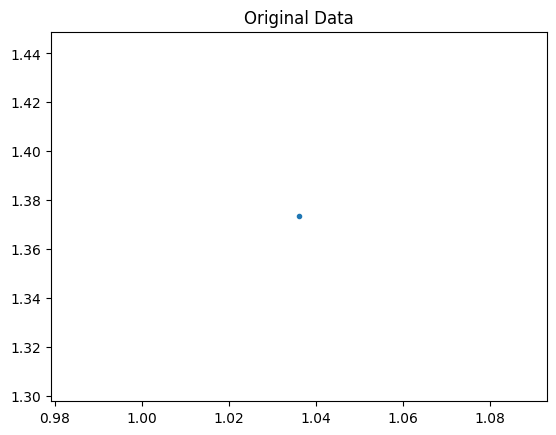

In [608]:
return_vals = {}
for lab, v in dict_hirid_drugs.items():
    med, lab_mimic = v[0], v[1]
    return_vals[lab_mimic] = create_gum_func(df_inhuman, lab, med, lab_mimic, med_lab_pairs)

In [454]:
# lab = "Hemoglobin [Mass/volume] in Blood"
# med = 'Intravenous blood transfusion of packed cells'
# lab_mimic = "Hemoglobin"
t_m_l = med_lab_pairs[med_lab_pairs["LAB_NAME"]==lab]
print(f"Pairs df shape after lab filter : {t_m_l.shape}")

Pairs df shape after lab filter : (5744, 51)


In [455]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
72,NaN,NaN,NaN,magnesium,NaN,metabolic_panel,Magnesium,1.8,2.55,0.5,4,mg/dL


In [456]:
ref = hirid_parser.h_var_ref
ref[ref["Variable Name"]==lab]

,Source Table,variableid,Variable Name,Unit,Additional information
98,Observation,24000230,Magnesium [Moles/volume] in Blood,mmol/l,NaN


In [457]:
all_types = set(["abs", "mean", "std"])
cols_b = [f"before_{t}_{b_w}_sp" for b_w in before_windows for t in all_types]
cols_a = [f"after_{t}_{a_w}_sp" for a_w in after_windows for t in all_types]
cols = cols_b.copy()
cols.extend(cols_a)

In [458]:
t_m_l[cols] = t_m_l[cols] * hirid_to_mimic_unit_conversion[lab_mimic][2]

/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_20057/3762855008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_m_l[cols] = t_m_l[cols] * hirid_to_mimic_unit_conversion[lab_mimic][2]


In [604]:
t_m_l[["before_abs_(0, 6)_sp", "after_abs_(0, 4)_sp"]].dropna()

,"before_abs_(0, 6)_sp","after_abs_(0, 4)_sp"
1400,0.45621,0.45210
12755,0.31647,0.78090
24057,0.33291,0.31236
32876,0.45210,0.41100
44956,0.64938,0.57129
56062,0.34524,0.28359
56128,0.34524,0.28359
57382,0.40689,0.80556
57549,0.40689,0.80556
69384,0.42744,0.41922


In [459]:
max_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['max_inhuman'].tolist()[0])
min_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['min_inhuman'].tolist()[0])
a_w = (0,4)
b_w = (0,6)
t_m_l1 = t_m_l[t_m_l[f'after_abs_{a_w}_sp'] > min_val]
t_m_l1 = t_m_l1[t_m_l1[f'before_abs_{b_w}_sp'] > min_val]
t_m_l1 = t_m_l1[t_m_l1[f'after_abs_{a_w}_sp'] < max_val]
t_m_l1 = t_m_l1[t_m_l1[f'before_abs_{b_w}_sp'] < max_val]


In [461]:
t_m_l1

,HADM_ID,OldITEMID,STARTTIME,ENDTIME,givendose,cumulativedose,fluidamount_calc,cumulfluidamount_calc,doseunit,route,...,"after_mean_(4, 8)_sp","after_time_(4, 8)_sp","after_abs_(4, 8)_sp","after_std_(4, 8)_sp","after_trends_(8, 12)_sp","after_mean_(8, 12)_sp","after_time_(8, 12)_sp","after_abs_(8, 12)_sp","after_std_(8, 12)_sp",LAB_NAME
44956,12169,1000747,2104-10-29 03:46:00,2104-10-29 03:46:46.610,20.0,20.0,2.0,2.0,mg,cv-inj,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magnesium [Moles/volume] in Blood


In [462]:
t_m_l2 = t_m_l1[t_m_l1["MED_NAME"]==med]
print(f"Pairs df shape after med filter : {t_m_l1.shape}")

Pairs df shape after med filter : (1, 51)


### Feature Comparision Plots

TtestResult(statistic=280.0851161951312, pvalue=0.0, df=2731)


Text(0.5, 0, 'Arterial pressure')

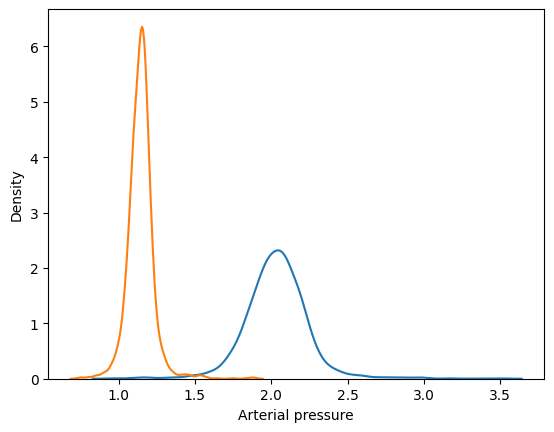

In [22]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = 'Calcium [Moles/volume] in Blood'
lab2 = 'Calcium.ionized [Moles/volume] in Blood'
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab1, lab2]].dropna(subset=lab1).dropna(subset=lab2)
print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered, x=lab1)
sns.kdeplot(data=temp_filtered, x=lab2)
plt.xlabel("Arterial pressure")

In [502]:
mimic_extract.columns

Index(['charttime', 'subject_id', 'icustay_id', 'hadm_id', 'Heart Rate',
       'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
       'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
       'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
       'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
       'Lymphocytes', 'Neutrophils', 'Prothrombin time INR', 'DEATHTIME',
       'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS',
       'Mortality', 'LABEL_48'],
      dtype='object')

(0.0, 50.0)

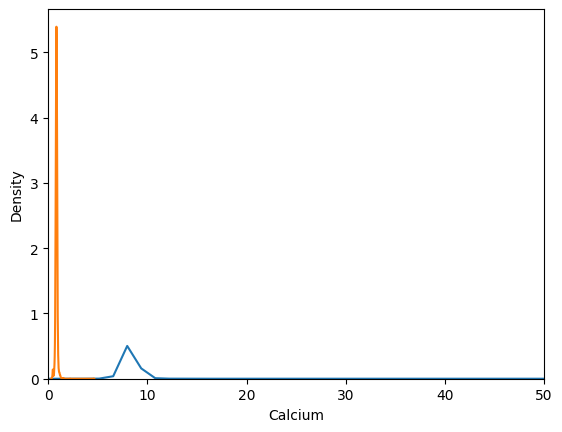

In [515]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = 'Calcium'
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = 'Calcium [Moles/volume] in Blood'
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 0.411
# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1)
sns.kdeplot(data=temp_filtered, x=lab2)
# plt.xlabel("Arterial pressure")
plt.xlim(0, 50)

In [516]:
temp_filtered1

,charttime,subject_id,icustay_id,hadm_id,DEATHTIME,DISCHTIME,ADMITTIME,ETHNICITY,GENDER,age,LOS,Mortality,LABEL_48,Calcium
4,2100-06-09 03:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,10 days 06:36:00,1,0,7.8
27,2100-06-10 03:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,10 days 06:36:00,1,0,8.1
52,2100-06-11 04:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,10 days 06:36:00,1,0,8.1
71,2100-06-11 23:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,10 days 06:36:00,1,0,8.4
102,2100-06-13 06:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,10 days 06:36:00,1,0,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868388,2205-10-26 16:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,3 days 12:08:00,1,0,7.6
1868398,2205-10-27 02:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,3 days 12:08:00,1,0,7.6
1868400,2205-10-27 04:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,3 days 12:08:00,1,0,7.6
1868423,2205-10-28 03:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,3 days 12:08:00,1,0,7.7


In [517]:
temp_filtered

,HADM_ID,AGE,GENDER,DATE,HOUR,EST_DISCHTIME,CHARTTIME,discharge_status,LABEL_48,Calcium [Moles/volume] in Blood
430,621,70,F,2190-06-20,22,2190-06-23 05:37:06.060,2190-06-20 22:00:00,alive,0,0.83022
606,664,60,F,2173-05-26,13,2173-06-10 06:26:00.000,2173-05-26 13:00:00,alive,0,0.82611
1173,833,65,F,2172-07-31,22,2172-08-02 01:39:44.340,2172-07-31 22:00:00,alive,0,0.90009
1959,2088,65,F,2151-02-03,20,2151-02-11 03:21:25.020,2151-02-03 20:00:00,alive,0,0.80556
2289,2402,80,M,2137-10-21,6,2137-11-03 06:40:33.460,2137-10-21 06:00:00,alive,0,0.95352
...,...,...,...,...,...,...,...,...,...,...
1597919,31965,65,F,2120-01-17,6,2120-01-31 01:10:36.750,2120-01-17 06:00:00,alive,0,0.73158
1597948,31965,65,F,2120-01-18,11,2120-01-31 01:10:36.750,2120-01-18 11:00:00,alive,0,0.75213
1598227,31965,65,F,2120-01-30,4,2120-01-31 01:10:36.750,2120-01-30 04:00:00,alive,0,0.83433
1598326,32418,80,F,2156-07-30,21,2156-08-03 02:14:30.000,2156-07-30 21:00:00,alive,0,0.92475


Hemoglobin [Mass/volume] in blood Carboxyhemoglobin/Hemoglobin.total in Arterial blood TtestResult(statistic=2443.2668964372006, pvalue=0.0, df=195165)
Carboxyhemoglobin/Hemoglobin.total in Arterial blood Methemoglobin/Hemoglobin.total in Arterial blood TtestResult(statistic=260.42505974494924, pvalue=0.0, df=195165)
Hemoglobin [Mass/volume] in blood Methemoglobin/Hemoglobin.total in Arterial blood TtestResult(statistic=2470.411705730535, pvalue=0.0, df=195165)


Text(0.5, 0, 'Arterial pressure')

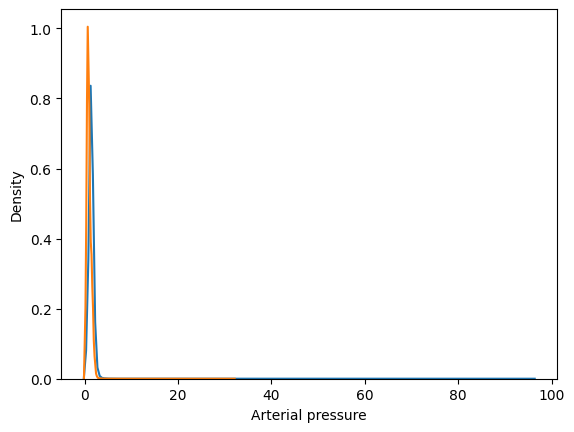

In [25]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = 'Hemoglobin [Mass/volume] in blood'
lab2 = 'Carboxyhemoglobin/Hemoglobin.total in Arterial blood'
lab3 = 'Methemoglobin/Hemoglobin.total in Arterial blood'
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab1, lab2, lab3]].dropna(subset=lab1).dropna(subset=lab2).dropna(subset=lab3)
print(lab1, lab2, stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
print(lab2, lab3, stats.ttest_rel(temp_filtered[lab2], temp_filtered[lab3]))
print(lab1, lab3, stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab3]))
# sns.kdeplot(data=temp_filtered, x=lab1)
sns.kdeplot(data=temp_filtered, x=lab2)
sns.kdeplot(data=temp_filtered, x=lab3)
plt.xlabel("Arterial pressure")

# Lab2 and lab3 are same

### Feature Mapping - OLD

In [50]:
hirid_mapping = {
    'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None,
    'Albumin [Mass/volume] in Serum or Plasma' : 'Albumin',
    'Amylase [Enzymatic activity/volume] in Serum or Plasma': None,
    'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None,
    'Bicarbonate [Moles/volume] in Arterial blood':'Bicarbonate',
    'Bilirubin.direct [Mass/volume] in Serum or Plasma': None,
    'Bilirubin.total [Moles/volume] in Serum or Plasma' : None,
    'Calcium [Moles/volume] in Blood': 'Calcium',
    'Calcium.ionized [Moles/volume] in Blood': 'Calcium',
    'Carboxyhemoglobin/Hemoglobin.total in Arterial blood': 'Hemoglobin',
    'Chloride [Moles/volume] in Blood': 'Chloride', 
    'Core body temperature': 'Temperature',
    'Creatinine [Moles/volume] in Blood': 'Creatinine', 
    'Diastolic arterial pressure': 'Diastolic blood pressure',
    'Glucose [Moles/volume] in Serum or Plasma': 'Glucose', 
    'Heart rate': 'Heart Rate',
    'Hemoglobin [Mass/volume] in blood': 'Hemoglobin',
    'INR in Blood by Coagulation assay': 'Prothrombin time INR', 
    'Lactate [Mass/volume] in blood': 'Lactic acid',
    'Lymphocytes [#/volume] in Blood': 'Lymphocytes', 
    'Magnesium [Moles/volume] in Blood': 'Magnesium',
    'Methemoglobin/Hemoglobin.total in Arterial blood': 'Hemoglobin',
    'Neutrophils/100 leukocytes in Blood': 'Neutrophils', 
    'Peripheral oxygen saturation': 'Oxygen saturation',
    'Platelets [#/volume] in Blood': 'Platelets', 
    'Potassium [Moles/volume] in Blood': 'Potassium',
    'Pulmonary artery diastolic pressure': 'Diastolic blood pressure',
    'Pulmonary artery systolic pressure': 'Systolic blood pressure', 
    'Respiratory rate': 'Respiratory rate',
    'Sodium [Moles/volume] in Blood': 'Sodium', 
    'Systolic arterial pressure': 'Systolic blood pressure'
}

In [57]:
count = 0
for k, v in hirid_mapping.items():
    count+=1
    if v is None:
        continue
    lab1 = k
    lab2 = v
    temp_filtered1 = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab1]].dropna(subset=lab1)
    temp_filtered2 = mimic_extract[['hadm_id', 'age', 'GENDER', 'DISCHTIME', 'charttime', lab2]].dropna(subset=lab2)
    sns.kdeplot(data=temp_filtered1, x=lab1)
    sns.kdeplot(data=temp_filtered2, x=lab2)
    plt.title(f"{lab1} <> {lab2}")
    plt.savefig(f"/Users/pavan/Desktop/TAU/DrugLab/plots/compare/{count}.png")
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [66]:
mimic_labs = ['Heart Rate',
'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
'Lymphocytes', 'Neutrophils', 'Prothrombin time INR']
mimic_res_dict = []
for col in mimic_labs:
    row = {
        "Lab Name": col,
         "Unit": None,
         "N": mimic_extract.shape[0]-mimic_extract[mimic_extract[col].isna()].shape[0],
         "Mean": f"{round(mimic_extract[[col]].dropna().mean()[0], 2)}",
         "Std": f"{round(mimic_extract[[col]].dropna().std()[0], 2)}",
         "Missing Rate (%)": f"{round(mimic_extract[mimic_extract[col].isna()].shape[0] * 100 / mimic_extract.shape[0], 2)}"
    }
    mimic_res_dict.append(row)
mimic_res_df = pd.DataFrame(mimic_res_dict)

In [67]:
mimic_res_df

,Lab Name,Unit,N,Mean,Std,Missing Rate (%)
0,Heart Rate,None,1753589,85.32,17.23,6.15
1,Respiratory rate,None,1742362,18.97,5.96,6.75
2,Oxygen saturation,None,1665084,96.68,3.69,10.88
3,Systolic blood pressure,None,1702806,122.05,21.86,8.86
4,Diastolic blood pressure,None,1706659,61.11,13.98,8.66
5,Temperature,None,588149,37.0,0.78,68.52
6,Glucose,None,485697,141.31,58.72,74.01
7,Potassium,None,205249,4.16,0.69,89.01
8,Sodium,None,208212,138.52,5.26,88.86
9,Chloride,None,194932,105.14,6.32,89.57


In [97]:
mimic_res_df.to_csv(os.path.join(res, "MIMIC Missing Rate.csv"))

In [71]:
labitems = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_LABITEMS.csv.gz"))

In [78]:
labitems

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN
...,...,...,...,...,...,...
748,749,51551,VOIDED SPECIMEN,OTHER BODY FLUID,HEMATOLOGY,NaN
749,750,51552,VOIDED SPECIMEN,STOOL,CHEMISTRY,NaN
750,751,51553,VOIDED SPECIMEN,URINE,CHEMISTRY,NaN
751,752,51554,VOIDED SPECIMEN,JOINT FLUID,HEMATOLOGY,NaN


In [79]:
items = pd.read_csv(os.path.join(data, "mimiciii/1.4/raw", "D_ITEMS.csv.gz"))
items

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
0,457,497,Patient controlled analgesia (PCA) [Inject],NaN,carevue,chartevents,NaN,NaN,NaN,NaN
1,458,498,PCA Lockout (Min),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
2,459,499,PCA Medication,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
3,460,500,PCA Total Dose,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
4,461,501,PCV Exh Vt (Obser),NaN,carevue,chartevents,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12482,14518,226757,GCSMotorApacheIIValue,GCSMotorApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN
12483,14519,226758,GCSVerbalApacheIIValue,GCSVerbalApacheIIValue,metavision,chartevents,Scores - APACHE II,NaN,Text,NaN
12484,14520,226759,HCO3ApacheIIValue,HCO3ApacheIIValue,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN
12485,14521,226760,HCO3Score,HCO3Score,metavision,chartevents,Scores - APACHE II,None,Numeric,NaN


In [85]:
mimic_res_df_with_labitemids = pd.merge(labitems[["LABEL", "ITEMID"]], mimic_res_df,  right_on="Lab Name", left_on="LABEL").drop(columns=["LABEL"])
mimic_res_df_with_labitemids

,ITEMID,Lab Name,Unit,N,Mean,Std,Missing Rate (%)
0,51375,Lymphocytes,None,21982,13.58,11.69,98.82
1,51427,Lymphocytes,None,21982,13.58,11.69,98.82
2,51446,Lymphocytes,None,21982,13.58,11.69,98.82
3,51116,Lymphocytes,None,21982,13.58,11.69,98.82
4,51244,Lymphocytes,None,21982,13.58,11.69,98.82
5,50809,Glucose,None,485697,141.31,58.72,74.01
6,50931,Glucose,None,485697,141.31,58.72,74.01
7,51478,Glucose,None,485697,141.31,58.72,74.01
8,50811,Hemoglobin,None,170577,10.65,1.96,90.87
9,51222,Hemoglobin,None,170577,10.65,1.96,90.87


In [92]:
mimic_res_df_with_itemids = pd.merge(items[["LABEL", "ITEMID", "UNITNAME"]], mimic_res_df,  right_on="Lab Name", left_on="LABEL").drop(columns=["LABEL"])
mimic_res_df_with_itemids

,ITEMID,UNITNAME,Lab Name,Unit,N,Mean,Std,Missing Rate (%)
0,211,NaN,Heart Rate,None,1753589,85.32,17.23,6.15
1,220045,bpm,Heart Rate,None,1753589,85.32,17.23,6.15
2,813,NaN,Hematocrit,None,244987,31.02,5.5,86.89
3,814,NaN,Hemoglobin,None,170577,10.65,1.96,90.87
4,220228,g/dl,Hemoglobin,None,170577,10.65,1.96,90.87
5,828,NaN,Platelets,None,140132,204.05,113.93,92.5
6,30006,NaN,Platelets,None,140132,204.05,113.93,92.5
7,225170,mL,Platelets,None,140132,204.05,113.93,92.5
8,1521,NaN,Albumin,None,21111,3.06,0.68,98.87
9,46564,NaN,Albumin,None,21111,3.06,0.68,98.87


In [95]:
mimic_res_df_with_itemids.dropna(subset=["UNITNAME"])

,ITEMID,UNITNAME,Lab Name,Unit,N,Mean,Std,Missing Rate (%)
1,220045,bpm,Heart Rate,None,1753589,85.32,17.23,6.15
4,220228,g/dl,Hemoglobin,None,170577,10.65,1.96,90.87
7,225170,mL,Platelets,None,140132,204.05,113.93,92.5
10,227456,None,Albumin,None,21111,3.06,0.68,98.87
15,220615,None,Creatinine,None,139957,1.4,1.53,92.51
19,220635,None,Magnesium,None,129224,2.05,0.42,93.08


In [86]:
hirid_labs = hirid_mapping.keys()
hirid_res_dict = []
for col in hirid_labs:
    row = {
        "Lab Name": col,
        "Possible MIMIC Name": hirid_mapping[col],
         "Unit": col[col.index("[")+1:col.index("]")] if "[" in col else None,
         "N": hirid_extract.shape[0]-hirid_extract[hirid_extract[col].isna()].shape[0],
         "Mean": f"{round(hirid_extract[[col]].dropna().mean()[0], 2)}",
         "Std": f"{round(hirid_extract[[col]].dropna().std()[0], 2)}",
         "Missing Rate (%)": f"{round(hirid_extract[hirid_extract[col].isna()].shape[0] * 100 / hirid_extract.shape[0], 2)}"
    }
    hirid_res_dict.append(row)
hirid_res_df = pd.DataFrame(hirid_res_dict)

In [87]:
hirid_res_df

,Lab Name,Possible MIMIC Name,Unit,N,Mean,Std,Missing Rate (%)
0,Alanine aminotransferase [Enzymatic activity/v...,None,Enzymatic activity/volume,35515,189.52,573.99,97.78
1,Albumin [Mass/volume] in Serum or Plasma,Albumin,Mass/volume,4546,20.5,6.35,99.72
2,Amylase [Enzymatic activity/volume] in Serum o...,None,Enzymatic activity/volume,4354,86.1,157.03,99.73
3,Aspartate aminotransferase [Enzymatic activity...,None,Enzymatic activity/volume,32489,317.82,1204.44,97.97
4,Bicarbonate [Moles/volume] in Arterial blood,Bicarbonate,Moles/volume,201223,24.33,4.16,87.42
5,Bilirubin.direct [Mass/volume] in Serum or Plasma,None,Mass/volume,2964,47.0,101.96,99.81
6,Bilirubin.total [Moles/volume] in Serum or Plasma,None,Moles/volume,26091,36.05,74.69,98.37
7,Calcium [Moles/volume] in Blood,Calcium,Moles/volume,4609,2.04,0.27,99.71
8,Calcium.ionized [Moles/volume] in Blood,Calcium,Moles/volume,200237,1.15,0.26,87.49
9,Carboxyhemoglobin/Hemoglobin.total in Arterial...,Hemoglobin,None,200444,1.42,0.6,87.47


In [98]:
hirid_res_df.to_csv(os.path.join(res, "HIRID Missing Rate.csv"))

In [89]:
pd.merge(mimic_res_df, hirid_res_df, how="outer", left_on="Lab Name", right_on="Possible MIMIC Name")

,Lab Name_x,Unit_x,N_x,Mean_x,Std_x,Missing Rate (%)_x,Lab Name_y,Possible MIMIC Name,Unit_y,N_y,Mean_y,Std_y,Missing Rate (%)_y
0,Heart Rate,None,1753589.0,85.32,17.23,6.15,Heart rate,Heart Rate,None,1591544.0,85.41,17.03,0.54
1,Respiratory rate,None,1742362.0,18.97,5.96,6.75,Respiratory rate,Respiratory rate,None,1209116.0,61.4,317.63,24.44
2,Oxygen saturation,None,1665084.0,96.68,3.69,10.88,Peripheral oxygen saturation,Oxygen saturation,None,1569377.0,96.96,742.06,1.92
3,Systolic blood pressure,None,1702806.0,122.05,21.86,8.86,Pulmonary artery systolic pressure,Systolic blood pressure,None,168067.0,39.35,12.51,89.5
4,Systolic blood pressure,None,1702806.0,122.05,21.86,8.86,Systolic arterial pressure,Systolic blood pressure,None,1567333.0,119.81,49.59,2.05
5,Diastolic blood pressure,None,1706659.0,61.11,13.98,8.66,Diastolic arterial pressure,Diastolic blood pressure,None,1567502.0,58.56,12.46,2.04
6,Diastolic blood pressure,None,1706659.0,61.11,13.98,8.66,Pulmonary artery diastolic pressure,Diastolic blood pressure,None,168066.0,18.91,7.98,89.5
7,Temperature,None,588149.0,37.0,0.78,68.52,Core body temperature,Temperature,None,188307.0,37.18,1.08,88.23
8,Glucose,None,485697.0,141.31,58.72,74.01,Glucose [Moles/volume] in Serum or Plasma,Glucose,Moles/volume,397408.0,8.56,30.55,75.16
9,Potassium,None,205249.0,4.16,0.69,89.01,Potassium [Moles/volume] in Blood,Potassium,Moles/volume,218187.0,4.15,0.8,86.36


In [90]:
pd.merge(hirid_res_df, mimic_res_df, how="outer", right_on="Lab Name", left_on="Possible MIMIC Name")

,Lab Name_x,Possible MIMIC Name,Unit_x,N_x,Mean_x,Std_x,Missing Rate (%)_x,Lab Name_y,Unit_y,N_y,Mean_y,Std_y,Missing Rate (%)_y
0,Alanine aminotransferase [Enzymatic activity/v...,None,Enzymatic activity/volume,35515.0,189.52,573.99,97.78,NaN,NaN,NaN,NaN,NaN,NaN
1,Amylase [Enzymatic activity/volume] in Serum o...,None,Enzymatic activity/volume,4354.0,86.1,157.03,99.73,NaN,NaN,NaN,NaN,NaN,NaN
2,Aspartate aminotransferase [Enzymatic activity...,None,Enzymatic activity/volume,32489.0,317.82,1204.44,97.97,NaN,NaN,NaN,NaN,NaN,NaN
3,Bilirubin.direct [Mass/volume] in Serum or Plasma,None,Mass/volume,2964.0,47.0,101.96,99.81,NaN,NaN,NaN,NaN,NaN,NaN
4,Bilirubin.total [Moles/volume] in Serum or Plasma,None,Moles/volume,26091.0,36.05,74.69,98.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Albumin [Mass/volume] in Serum or Plasma,Albumin,Mass/volume,4546.0,20.5,6.35,99.72,Albumin,None,21111.0,3.06,0.68,98.87
6,Bicarbonate [Moles/volume] in Arterial blood,Bicarbonate,Moles/volume,201223.0,24.33,4.16,87.42,Bicarbonate,None,106933.0,24.33,4.81,94.28
7,Calcium [Moles/volume] in Blood,Calcium,Moles/volume,4609.0,2.04,0.27,99.71,Calcium,None,138114.0,8.31,1.79,92.61
8,Calcium.ionized [Moles/volume] in Blood,Calcium,Moles/volume,200237.0,1.15,0.26,87.49,Calcium,None,138114.0,8.31,1.79,92.61
9,Carboxyhemoglobin/Hemoglobin.total in Arterial...,Hemoglobin,None,200444.0,1.42,0.6,87.47,Hemoglobin,None,170577.0,10.65,1.96,90.87


In [99]:
pd.merge(hirid_res_df, mimic_res_df, how="outer", right_on="Lab Name", left_on="Possible MIMIC Name").to_csv(os.path.join(res, "Merged MIMIC and HIRID.csv"))

In [100]:
hirid_mimic_feature_mapping = {
    'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None, # Absent in MIMIC longitudanal data
    'Albumin [Mass/volume] in Serum or Plasma' : None, # Large difference in mean. Units are different? 
    'Amylase [Enzymatic activity/volume] in Serum or Plasma': None,  # Absent in MIMIC longitudanal data
    'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None,  # Absent in MIMIC longitudanal data
    'Bicarbonate [Moles/volume] in Arterial blood':'Bicarbonate',
    'Bilirubin.direct [Mass/volume] in Serum or Plasma': None,  # Absent in MIMIC longitudanal data
    'Bilirubin.total [Moles/volume] in Serum or Plasma' : None, # Absent in MIMIC longitudanal data
    'Calcium [Moles/volume] in Blood': None, # Large difference in mean. Units are different? 
    'Calcium.ionized [Moles/volume] in Blood': None, # Large difference in mean. not same labtest or Units are different? 
    'Carboxyhemoglobin/Hemoglobin.total in Arterial blood': None,  # Large difference in mean. Not same lab tests.
    'Chloride [Moles/volume] in Blood': 'Chloride', 
    'Core body temperature': 'Temperature',
    'Creatinine [Moles/volume] in Blood': None,  # Large difference in mean. Units are different? 
    'Diastolic arterial pressure': 'Diastolic blood pressure',
    'Glucose [Moles/volume] in Serum or Plasma': None, # Large difference in mean. Units are different? 
    'Heart rate': 'Heart Rate',
    'Hemoglobin [Mass/volume] in blood': None,   # Large difference in mean. Units are different? 
    'INR in Blood by Coagulation assay': 'Prothrombin time INR', 
    'Lactate [Mass/volume] in blood': 'Lactic acid',
    'Lymphocytes [#/volume] in Blood': 'Lymphocytes', 
    'Magnesium [Moles/volume] in Blood': 'Magnesium',
    'Methemoglobin/Hemoglobin.total in Arterial blood': None,  # Large difference in mean. Not same lab tests.
    'Neutrophils/100 leukocytes in Blood': None,  # Large difference in mean. Units are different? 
    'Peripheral oxygen saturation': 'Oxygen saturation',  
    'Platelets [#/volume] in Blood': 'Platelets', 
    'Potassium [Moles/volume] in Blood': 'Potassium',
    'Pulmonary artery diastolic pressure': None,  # Absent in MIMIC longitudanal data
    'Pulmonary artery systolic pressure': None, # Absent in MIMIC longitudanal data
    'Respiratory rate': 'Respiratory rate',
    'Sodium [Moles/volume] in Blood': 'Sodium', 
    'Systolic arterial pressure': 'Systolic blood pressure'
}

In [111]:
hirid_col_dict = {k:v for k,v in hirid_mimic_feature_mapping.items() if v is not None}

In [ ]:
# same as hirid_col_dict
hirid_col_dict_raw = {
    'Bicarbonate [Moles/volume] in Arterial blood': 'Bicarbonate',
    'Chloride [Moles/volume] in Blood': 'Chloride',
    'Core body temperature': 'Temperature',
    'Diastolic arterial pressure': 'Diastolic blood pressure',
    'Heart rate': 'Heart Rate',
    'INR in Blood by Coagulation assay': 'Prothrombin time INR',
    'Lactate [Mass/volume] in blood': 'Lactic acid',
    'Lymphocytes [#/volume] in Blood': 'Lymphocytes',
    'Magnesium [Moles/volume] in Blood': 'Magnesium',
    'Peripheral oxygen saturation': 'Oxygen saturation',
    'Platelets [#/volume] in Blood': 'Platelets',
    'Potassium [Moles/volume] in Blood': 'Potassium',
    'Respiratory rate': 'Respiratory rate',
    'Sodium [Moles/volume] in Blood': 'Sodium',
    'Systolic arterial pressure': 'Systolic blood pressure'
 }

In [113]:
list(hirid_col_dict.keys())

['Bicarbonate [Moles/volume] in Arterial blood',
 'Chloride [Moles/volume] in Blood',
 'Core body temperature',
 'Diastolic arterial pressure',
 'Heart rate',
 'INR in Blood by Coagulation assay',
 'Lactate [Mass/volume] in blood',
 'Lymphocytes [#/volume] in Blood',
 'Magnesium [Moles/volume] in Blood',
 'Peripheral oxygen saturation',
 'Platelets [#/volume] in Blood',
 'Potassium [Moles/volume] in Blood',
 'Respiratory rate',
 'Sodium [Moles/volume] in Blood',
 'Systolic arterial pressure']

In [123]:
list(hirid_col_dict.values())

['Bicarbonate',
 'Chloride',
 'Temperature',
 'Diastolic blood pressure',
 'Heart Rate',
 'Prothrombin time INR',
 'Lactic acid',
 'Lymphocytes',
 'Magnesium',
 'Oxygen saturation',
 'Platelets',
 'Potassium',
 'Respiratory rate',
 'Sodium',
 'Systolic blood pressure']

In [116]:
hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'CHARTTIME', 'EST_DISCHTIME', 'discharge_status', 'LABEL_48']+list(hirid_col_dict.keys())]

,HADM_ID,AGE,GENDER,DATE,HOUR,CHARTTIME,EST_DISCHTIME,discharge_status,LABEL_48,Bicarbonate [Moles/volume] in Arterial blood,...,INR in Blood by Coagulation assay,Lactate [Mass/volume] in blood,Lymphocytes [#/volume] in Blood,Magnesium [Moles/volume] in Blood,Peripheral oxygen saturation,Platelets [#/volume] in Blood,Potassium [Moles/volume] in Blood,Respiratory rate,Sodium [Moles/volume] in Blood,Systolic arterial pressure
0,148,50,M,2183-05-12,12,2183-05-12 12:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,89.050000,NaN,NaN,31.0,NaN,155.111111
1,148,50,M,2183-05-12,13,2183-05-12 13:00:00,2183-05-14 01:31:10.010,alive,0,23.6,...,NaN,2.0,NaN,NaN,87.166667,NaN,4.3,28.0,136.0,99.000000
2,148,50,M,2183-05-12,14,2183-05-12 14:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,94.196429,NaN,NaN,NaN,NaN,81.160714
3,148,50,M,2183-05-12,15,2183-05-12 15:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,96.777778,NaN,NaN,14.0,NaN,78.111111
4,148,50,M,2183-05-12,16,2183-05-12 16:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,97.241379,NaN,NaN,14.0,NaN,81.689655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600127,33902,75,F,2182-12-13,9,2182-12-13 09:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,91.600000,NaN,NaN,NaN,NaN,88.193548
1600128,33902,75,F,2182-12-13,10,2182-12-13 10:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,90.466667,NaN,NaN,25.0,NaN,88.548387
1600129,33902,75,F,2182-12-13,11,2182-12-13 11:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,93.451613,NaN,NaN,NaN,NaN,81.655172
1600130,33902,75,F,2182-12-13,12,2182-12-13 12:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,0.0,NaN,94.033333,681.0,NaN,NaN,NaN,85.208333


In [127]:
h_e_t = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'CHARTTIME', 'EST_DISCHTIME', 'discharge_status', 'LABEL_48']+list(hirid_col_dict.keys())].rename(columns=hirid_col_dict)
h_e_t.to_csv(os.path.join(res, "hirid_longitudanal_15_feat.csv"))
h_e_t

,HADM_ID,AGE,GENDER,DATE,HOUR,CHARTTIME,EST_DISCHTIME,discharge_status,LABEL_48,Bicarbonate,...,Prothrombin time INR,Lactic acid,Lymphocytes,Magnesium,Oxygen saturation,Platelets,Potassium,Respiratory rate,Sodium,Systolic blood pressure
0,148,50,M,2183-05-12,12,2183-05-12 12:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,89.050000,NaN,NaN,31.0,NaN,155.111111
1,148,50,M,2183-05-12,13,2183-05-12 13:00:00,2183-05-14 01:31:10.010,alive,0,23.6,...,NaN,2.0,NaN,NaN,87.166667,NaN,4.3,28.0,136.0,99.000000
2,148,50,M,2183-05-12,14,2183-05-12 14:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,94.196429,NaN,NaN,NaN,NaN,81.160714
3,148,50,M,2183-05-12,15,2183-05-12 15:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,96.777778,NaN,NaN,14.0,NaN,78.111111
4,148,50,M,2183-05-12,16,2183-05-12 16:00:00,2183-05-14 01:31:10.010,alive,0,NaN,...,NaN,NaN,NaN,NaN,97.241379,NaN,NaN,14.0,NaN,81.689655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600127,33902,75,F,2182-12-13,9,2182-12-13 09:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,91.600000,NaN,NaN,NaN,NaN,88.193548
1600128,33902,75,F,2182-12-13,10,2182-12-13 10:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,90.466667,NaN,NaN,25.0,NaN,88.548387
1600129,33902,75,F,2182-12-13,11,2182-12-13 11:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,NaN,NaN,93.451613,NaN,NaN,NaN,NaN,81.655172
1600130,33902,75,F,2182-12-13,12,2182-12-13 12:00:00,2182-12-14 04:52:14.430,alive,0,NaN,...,NaN,NaN,0.0,NaN,94.033333,681.0,NaN,NaN,NaN,85.208333


In [128]:
m_e_t = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id', 'DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age']+list(hirid_col_dict.values())]
m_e_t.to_csv(os.path.join(res, "mimic_longitudanal_15_feat.csv"))
m_e_t

,charttime,subject_id,icustay_id,hadm_id,DEATHTIME,DISCHTIME,ADMITTIME,ETHNICITY,GENDER,age,...,Prothrombin time INR,Lactic acid,Lymphocytes,Magnesium,Oxygen saturation,Platelets,Potassium,Respiratory rate,Sodium,Systolic blood pressure
0,2100-06-08 23:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,...,1.1,NaN,16.4,NaN,NaN,426.0,5.7,NaN,134.0,NaN
1,2100-06-09 00:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2100-06-09 01:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,...,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN
3,2100-06-09 02:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,...,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,11.000000,NaN,142.0
4,2100-06-09 03:00:00+00:00,29156,293407,161773,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18,...,1.1,NaN,2.0,1.8,100.000000,372.0,4.1,24.000000,137.0,138.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868426,2205-10-28 06:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,...,NaN,NaN,NaN,NaN,99.000000,NaN,NaN,23.000000,NaN,111.5
1868427,2205-10-28 07:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,...,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,18.000000,NaN,88.5
1868428,2205-10-28 08:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,...,NaN,NaN,NaN,NaN,89.333333,NaN,NaN,26.333333,NaN,105.0
1868429,2205-10-28 09:00:00+00:00,86042,255110,191143,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47,...,NaN,NaN,NaN,NaN,87.666667,NaN,NaN,22.500000,NaN,93.5


### HIRID and MIMIC Statistics (Before and After ffill)

In [185]:
# mimic_extract_ffill = mimic_extract.ffill()

In [186]:
# mimic_extract_ffill

,charttime,subject_id,icustay_id,hadm_id,Heart Rate,Respiratory rate,Oxygen saturation,Systolic blood pressure,Diastolic blood pressure,Temperature,...,Mean corpuscular volume,Lymphocytes,Neutrophils,Prothrombin time INR,DEATHTIME,DISCHTIME,ADMITTIME,ETHNICITY,GENDER,age
0,2100-06-08 23:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,16.4,74.6,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
1,2100-06-09 00:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,16.4,74.6,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
2,2100-06-09 01:00:00+00:00,29156,293407,161773,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,16.4,74.6,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
3,2100-06-09 02:00:00+00:00,29156,293407,161773,106.000000,11.000000,100.000000,142.0,67.0,36.499999,...,95.0,16.4,74.6,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
4,2100-06-09 03:00:00+00:00,29156,293407,161773,114.000000,24.000000,100.000000,138.0,73.0,36.499999,...,98.0,2.0,96.9,1.1,2100-06-19 08:15:00,2100-06-19 08:15:00,2100-06-09 01:39:00,WHITE,M,72.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868426,2205-10-28 06:00:00+00:00,86042,255110,191143,108.000000,23.000000,99.000000,111.5,47.5,36.333333,...,92.0,13.8,84.1,1.1,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868427,2205-10-28 07:00:00+00:00,86042,255110,191143,112.000000,18.000000,100.000000,88.5,45.5,36.333333,...,92.0,13.8,84.1,1.1,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868428,2205-10-28 08:00:00+00:00,86042,255110,191143,116.333333,26.333333,89.333333,105.0,53.0,36.333333,...,92.0,13.8,84.1,1.1,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47
1868429,2205-10-28 09:00:00+00:00,86042,255110,191143,116.500000,22.500000,87.666667,93.5,46.0,36.333333,...,92.0,13.8,84.1,1.1,2205-10-28 10:00:00,2205-10-28 10:00:00,2205-10-24 21:52:00,WHITE,M,82.47


In [9]:
mimic_extract[["hadm_id", 'Heart Rate']].groupby("hadm_id").count().shape[0]

29589

In [10]:
100 - (mimic_extract[["hadm_id", 'Heart Rate']].dropna().groupby("hadm_id").count().shape[0] * 100 / mimic_extract[["hadm_id", 'Heart Rate']].groupby("hadm_id").count().shape[0])

0.5711582006826887

In [11]:
df_inhuman

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
0,DIABETES_MELLITUS,NaN,diabetes_diagnosis,bd_diabetes_mellitus,NaN,background_diseases,Diabetes Mellitus,NaN,NaN,NaN,NaN,binary
1,HYPERTENSION,NaN,hypertension__diagnosis,bd_hypertension,NaN,background_diseases,Hypertension,NaN,NaN,NaN,NaN,binary
2,NaN,NaN,NaN,NaN,NaN,bloog_gas,HCO3,NaN,NaN,NaN,NaN,mmol/L
3,NaN,NaN,NaN,NaN,NaN,bloog_gas,Lacatate,NaN,NaN,0.2,15,mmol/L
4,NaN,NaN,NaN,NaN,NaN,bloog_gas,pCO2,NaN,NaN,1,150,mmHg
...,...,...,...,...,...,...,...,...,...,...,...,...
100,HOMOCYSTEIN,NaN,NaN,homocysteine,HOMOCYSTREIN,NaN,homocysteine,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,HCO3,22,26,1,100,mmol/L
102,NaN,NaN,NaN,NaN,NaN,NaN,pH,NaN,NaN,NaN,NaN,pH
103,PSA,NaN,psa,psa,PSA_TOTAL,NaN,NaN,0,4,NaN,NaN,NaN


In [12]:
mimic_labs = ['Heart Rate',
'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
'Lymphocytes', 'Neutrophils', 'Prothrombin time INR']
mimic_extract_ffill = mimic_extract.copy()
for col in mimic_labs:
    mimic_extract_ffill[col] = mimic_extract_ffill.groupby('hadm_id')[col].ffill()


In [303]:
mimic_labs = ['Heart Rate',
'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
'Lymphocytes', 'Neutrophils', 'Prothrombin time INR']
mimic_res_dict1 = []
for col in mimic_labs:
    row = {
        "Lab Name": col,
        "Unit": None,
        ("Before ffill", "N"): mimic_extract.shape[0]-mimic_extract[mimic_extract[col].isna()].shape[0],
        ("Before ffill", "N Subjects"): mimic_extract[["hadm_id", col]].dropna().groupby("hadm_id").count().shape[0],
        ("Before ffill", 'Subjects Missing Rate(%)'): 100 - (mimic_extract[["hadm_id",col]].dropna().groupby("hadm_id").count().shape[0] * 100 / mimic_extract[["hadm_id", col]].groupby("hadm_id").count().shape[0]),
        ("Before ffill","Mean"): f"{round(mimic_extract[[col]].dropna().mean()[0], 2)}",
        ("Before ffill","Std"): f"{round(mimic_extract[[col]].dropna().std()[0], 2)}",
        ("Before ffill","Missing Rate (%)"): f"{round(mimic_extract[mimic_extract[col].isna()].shape[0] * 100 / mimic_extract.shape[0], 2)}",
        ("After ffill", "N"): mimic_extract_ffill.shape[0]-mimic_extract_ffill[mimic_extract_ffill[col].isna()].shape[0],
        ("After ffill", "N Subjects"): mimic_extract_ffill[["hadm_id", col]].dropna().groupby("hadm_id").count().shape[0],
        ("After ffill", 'Subjects Missing Rate(%)'): 100 - (mimic_extract_ffill[["hadm_id", col]].dropna().groupby("hadm_id").count().shape[0] * 100 / mimic_extract_ffill[["hadm_id", col]].groupby("hadm_id").count().shape[0]),
        ("After ffill","Mean"): f"{round(mimic_extract_ffill[[col]].dropna().mean()[0], 2)}",
        ("After ffill","Std"): f"{round(mimic_extract_ffill[[col]].dropna().std()[0], 2)}",
        ("After ffill","Missing Rate (%)"): f"{round(mimic_extract_ffill[mimic_extract_ffill[col].isna()].shape[0] * 100 / mimic_extract_ffill.shape[0], 2)}",
         
    }
    mimic_res_dict1.append(row)
mimic_res_df_ffill = pd.DataFrame(mimic_res_dict1)

In [306]:
mimic_res_df_ffill_temp = mimic_res_df_ffill[[('Before ffill', 'N'),
                     ('Before ffill', 'N Subjects'),
       ('Before ffill', 'Subjects Missing Rate(%)'),
                           ('Before ffill', 'Mean'),
                            ('Before ffill', 'Std'),
               ('Before ffill', 'Missing Rate (%)'),
                               ('After ffill', 'N'),
                      ('After ffill', 'N Subjects'),
        ('After ffill', 'Subjects Missing Rate(%)'),
                            ('After ffill', 'Mean'),
                             ('After ffill', 'Std'),
                ('After ffill', 'Missing Rate (%)')]]

In [307]:
mimic_res_df_ffill_temp.columns = pd.MultiIndex.from_tuples(mimic_res_df_ffill_temp.columns)

In [308]:
mimic_res_df_ffill_temp["Lab Name"] = mimic_res_df_ffill["Lab Name"]
mimic_res_df_ffill_temp["Unit"] = mimic_res_df_ffill["Unit"]

/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_20057/195220722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mimic_res_df_ffill_temp["Lab Name"] = mimic_res_df_ffill["Lab Name"]


In [309]:
mimic_res_df_ffill_temp[[
            (    'Lab Name',                         ''),
            (        'Unit',                         ''),
            ('Before ffill',                        'N'),
            ('Before ffill',               'N Subjects'),
            ('Before ffill', 'Subjects Missing Rate(%)'),
            ('Before ffill',                     'Mean'),
            ('Before ffill',                      'Std'),
            ('Before ffill',         'Missing Rate (%)'),
            ( 'After ffill',                        'N'),
            ( 'After ffill',               'N Subjects'),
            ( 'After ffill', 'Subjects Missing Rate(%)'),
            ( 'After ffill',                     'Mean'),
            ( 'After ffill',                      'Std'),
            ( 'After ffill',         'Missing Rate (%)')]]

Lab Name  Unit Before ffill             \
                                              N N Subjects   
0                 Heart Rate  None      1753589      29420   
1           Respiratory rate  None      1742362      29403   
2          Oxygen saturation  None      1665084      29512   
3    Systolic blood pressure  None      1702806      29419   
4   Diastolic blood pressure  None      1706659      29419   
5                Temperature  None       588149      29348   
6                    Glucose  None       485697      29538   
7                  Potassium  None       205249      28637   
8                     Sodium  None       208212      29520   
9                   Chloride  None       194932      29452   
10                Creatinine  None       139957      29457   
11       Blood urea nitrogen  None       139435      29449   
12               Bicarbonate  None       106933      22051   
13                   Calcium  None       138114      26370   
14                   Albumin  None        21111      12185   
15     Lactate dehydrogenase  None        17653       9431   
16                 Magnesium  None       129224      28450   
17               Lactic acid  None        48041      13866   
18                Hematocrit  None       244987      29530   
19                Hemoglobin  None       170577      29483   
20                 Platelets  None       140132      29451   
21    White blood cell count  None       131464      29383   
22            Red blood cell  None       127630      29358   
23   Mean corpuscular volume  None       125142      29300   
24               Lymphocytes  None        21982      14835   
25               Neutrophils  None        22773      15145   
26      Prothrombin time INR  None        97062      27018   

                                                              After ffill  \
   Subjects Missing Rate(%)    Mean      Std Missing Rate (%)           N   
0                  0.571158   85.32    17.23             6.15     1802160   
1                  0.628612   18.97     5.96             6.75     1801031   
2                  0.260232   96.68     3.69            10.88     1809707   
3                  0.574538  122.05    21.86             8.86     1801513   
4                  0.574538   61.11    13.98             8.66     1801516   
5                  0.814492    37.0     0.78            68.52     1760393   
6                  0.172361  141.31    58.72            74.01     1836201   
7                  3.217412    4.16     0.69            89.01     1777686   
8                  0.233195  138.52     5.26            88.86     1829211   
9                  0.463010  105.14     6.32            89.57     1806921   
10                 0.446112     1.4     1.53            92.51     1780118   
11                 0.473149   26.44     22.2            92.54     1774563   
12                25.475684   24.33     4.81            94.28     1362705   
13                10.879043    8.31     1.79            92.61     1560724   
14                58.819156    3.06     0.68            98.87      785396   
15                68.126669  660.81  1590.68            99.06      609156   
16                 3.849403    2.05     0.42            93.08     1661876   
17                53.137990    2.75     2.93            97.43      957179   
18                 0.199398   31.02      5.5            86.89     1834769   
19                 0.358241   10.65     1.96            90.87     1822742   
20                 0.466390  204.05   113.93             92.5     1794546   
21                 0.696205   12.12    10.43            92.96     1774161   
22                 0.780696    3.53     0.66            93.17     1779877   
23                 0.976714   89.27     6.37             93.3     1774261   
24                49.863125   13.58    11.69            98.82      944157   
25                48.815438   78.01    14.64            98.78      965561   
26                 8.689040    1.53     1.34            94.81    

In [311]:
mimic_res_df_ffill_temp[[
            (    'Lab Name',                         ''),
            (        'Unit',                         ''),
            ('Before ffill',                        'N'),
            ('Before ffill',               'N Subjects'),
            ('Before ffill', 'Subjects Missing Rate(%)'),
            ('Before ffill',                     'Mean'),
            ('Before ffill',                      'Std'),
            ('Before ffill',         'Missing Rate (%)'),
            ( 'After ffill',                        'N'),
            ( 'After ffill',               'N Subjects'),
            ( 'After ffill', 'Subjects Missing Rate(%)'),
            ( 'After ffill',                     'Mean'),
            ( 'After ffill',                      'Std'),
            ( 'After ffill',         'Missing Rate (%)')]].to_csv(os.path.join(res, "MIMIC_missing_rate_after_ffill.csv"))

In [278]:
hirid_labs = hirid_mapping.keys()
hirid_extract_ffill = hirid_extract.copy()
for col in hirid_labs:
    hirid_extract_ffill[col] = hirid_extract_ffill.groupby('HADM_ID')[col].ffill()


In [292]:
hirid_labs = hirid_mapping.keys()
hirid_res_dict1 = []
for col in hirid_labs:
    row = {
        "Lab Name": col,
        "Possible MIMIC Name": hirid_mapping[col],
         "Unit": col[col.index("[")+1:col.index("]")] if "[" in col else None,
         
         
        ("Before ffill", "N"): hirid_extract.shape[0]-hirid_extract[hirid_extract[col].isna()].shape[0],
        ("Before ffill", "N Subjects"): hirid_extract[["HADM_ID", col]].dropna().groupby("HADM_ID").count().shape[0],
        ("Before ffill", 'Subjects Missing Rate(%)'): 100 - (hirid_extract[["HADM_ID", col]].dropna().groupby("HADM_ID").count().shape[0] * 100 / hirid_extract[["HADM_ID", col]].groupby("HADM_ID").count().shape[0]),
        ("Before ffill","Mean"): f"{round(hirid_extract[[col]].dropna().mean()[0], 2)}",
        ("Before ffill","Std"): f"{round(hirid_extract[[col]].dropna().std()[0], 2)}",
        ("Before ffill","Missing Rate (%)"): f"{round(hirid_extract[hirid_extract[col].isna()].shape[0] * 100 / hirid_extract.shape[0], 2)}",
        
        ("After ffill", "N"): hirid_extract_ffill.shape[0]-hirid_extract_ffill[hirid_extract_ffill[col].isna()].shape[0],
        ("After ffill", "N Subjects"): hirid_extract_ffill[["HADM_ID", col]].dropna().groupby("HADM_ID").count().shape[0],
        ("After ffill", 'Subjects Missing Rate(%)'): 100 - (hirid_extract_ffill[["HADM_ID", col]].dropna().groupby("HADM_ID").count().shape[0] * 100 / hirid_extract_ffill[["HADM_ID", col]].groupby("HADM_ID").count().shape[0]),
        ("After ffill","Mean"): f"{round(hirid_extract_ffill[[col]].dropna().mean()[0], 2)}",
        ("After ffill","Std"): f"{round(hirid_extract_ffill[[col]].dropna().std()[0], 2)}",
        ("After ffill","Missing Rate (%)"): f"{round(hirid_extract_ffill[hirid_extract_ffill[col].isna()].shape[0] * 100 / hirid_extract_ffill.shape[0], 2)}",
         
         
        #  "N": hirid_extract_ffill.shape[0]-hirid_extract_ffill[hirid_extract_ffill[col].isna()].shape[0],
        #  "Mean": f"{round(hirid_extract_ffill[[col]].dropna().mean()[0], 2)}",
        #  "Std": f"{round(hirid_extract_ffill[[col]].dropna().std()[0], 2)}",
        #  "Missing Rate (%)": f"{round(hirid_extract_ffill[hirid_extract_ffill[col].isna()].shape[0] * 100 / hirid_extract_ffill.shape[0], 2)}"
    }
    hirid_res_dict1.append(row)
hirid_res_df_ffill = pd.DataFrame(hirid_res_dict1)

In [294]:
hirid_res_df_ffill_temp = hirid_res_df_ffill[[('Before ffill', 'N'),
                     ('Before ffill', 'N Subjects'),
       ('Before ffill', 'Subjects Missing Rate(%)'),
                           ('Before ffill', 'Mean'),
                            ('Before ffill', 'Std'),
               ('Before ffill', 'Missing Rate (%)'),
                               ('After ffill', 'N'),
                      ('After ffill', 'N Subjects'),
        ('After ffill', 'Subjects Missing Rate(%)'),
                            ('After ffill', 'Mean'),
                             ('After ffill', 'Std'),
                ('After ffill', 'Missing Rate (%)')]]

In [295]:
hirid_res_df_ffill_temp.columns = pd.MultiIndex.from_tuples(hirid_res_df_ffill_temp.columns)

In [297]:
hirid_res_df_ffill_temp["Lab Name"] = hirid_res_df_ffill["Lab Name"]
hirid_res_df_ffill_temp["Unit"] = hirid_res_df_ffill["Unit"]
hirid_res_df_ffill_temp["Possible MIMIC Name"] = hirid_res_df_ffill["Possible MIMIC Name"]

/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_20057/3753556865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hirid_res_df_ffill_temp["Lab Name"] = hirid_res_df_ffill["Lab Name"]
/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_20057/3753556865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hirid_res_df_ffill_temp["Unit"] = hirid_res_df_ffill["Unit"]


In [300]:
hirid_res_df_ffill_temp[[
            (    'Lab Name',                         ''),
            (        'Unit',                         ''),
            ('Possible MIMIC Name', ''),
            ('Before ffill',                        'N'),
            ('Before ffill',               'N Subjects'),
            ('Before ffill', 'Subjects Missing Rate(%)'),
            ('Before ffill',                     'Mean'),
            ('Before ffill',                      'Std'),
            ('Before ffill',         'Missing Rate (%)'),
            ( 'After ffill',                        'N'),
            ( 'After ffill',               'N Subjects'),
            ( 'After ffill', 'Subjects Missing Rate(%)'),
            ( 'After ffill',                     'Mean'),
            ( 'After ffill',                      'Std'),
            ( 'After ffill',         'Missing Rate (%)')]]

Lab Name  \
                                                        
0   Alanine aminotransferase [Enzymatic activity/v...   
1            Albumin [Mass/volume] in Serum or Plasma   
2   Amylase [Enzymatic activity/volume] in Serum o...   
3   Aspartate aminotransferase [Enzymatic activity...   
4        Bicarbonate [Moles/volume] in Arterial blood   
5   Bilirubin.direct [Mass/volume] in Serum or Plasma   
6   Bilirubin.total [Moles/volume] in Serum or Plasma   
7                     Calcium [Moles/volume] in Blood   
8             Calcium.ionized [Moles/volume] in Blood   
9   Carboxyhemoglobin/Hemoglobin.total in Arterial...   
10                   Chloride [Moles/volume] in Blood   
11                              Core body temperature   
12                 Creatinine [Moles/volume] in Blood   
13                        Diastolic arterial pressure   
14          Glucose [Moles/volume] in Serum or Plasma   
15                                         Heart rate   
16                  Hemoglobin [Mass/volume] in blood   
17                  INR in Blood by Coagulation assay   
18                     Lactate [Mass/volume] in blood   
19                    Lymphocytes [#/volume] in Blood   
20                  Magnesium [Moles/volume] in Blood   
21   Methemoglobin/Hemoglobin.total in Arterial blood   
22                Neutrophils/100 leukocytes in Blood   
23                       Peripheral oxygen saturation   
24                      Platelets [#/volume] in Blood   
25                  Potassium [Moles/volume] in Blood   
26                Pulmonary artery diastolic pressure   
27                 Pulmonary artery systolic pressure   
28                                   Respiratory rate   
29                     Sodium [Moles/volume] in Blood   
30                         Systolic arterial pressure   

                         Unit       Possible MIMIC Name Before ffill  \
                                                                   N   
0   Enzymatic activity/volume                      None        35515   
1                 Mass/volume                   Albumin         4546   
2   Enzymatic activity/volume                      None         4354   
3   Enzymatic activity/volume                      None        32489   
4                Moles/volume               Bicarbonate       201223   
5                 Mass/volume                      None         2964   
6                Moles/volume                      None        26091   
7                Moles/volume                   Calcium         4609   
8                Moles/volume                   Calcium       200237   
9                        None                Hemoglobin       200444   
10               Moles/volume                  Chloride       196254   
11                       None               Temperature       188307   
12               Moles/volume                Creatinine        66308   
13                       None  Diastolic blood pressure      1567502   
14               Moles/volume                   Glucose       397408   
15                       None                Heart Rate      1591544   
16                Mass/volume                Hemoglobin       238408   
17                       None      Prothrombin time INR        56195   
18                Mass/volume               Lactic acid       205387   
19                   #/volume               Lymphocytes        23993   
20               Moles/volume                 Magnesium        46662   
21                       None                Hemoglobin       200461   
22                       None               Neutrophils        23998   
23                       None         Oxygen saturation      1569377   
24                   #/volume                 Platelets        88141   
25               Moles/volume                 Potassium       218187   
26                       None  Diastolic blood pressure       168066   
27                       None   Systolic blood pressure       168067   
28 

In [299]:
hirid_res_df_ffill_temp[[
            (    'Lab Name',                         ''),
            (        'Unit',                         ''),
            ('Possible MIMIC Name', ''),
            ('Before ffill',                        'N'),
            ('Before ffill',               'N Subjects'),
            ('Before ffill', 'Subjects Missing Rate(%)'),
            ('Before ffill',                     'Mean'),
            ('Before ffill',                      'Std'),
            ('Before ffill',         'Missing Rate (%)'),
            ( 'After ffill',                        'N'),
            ( 'After ffill',               'N Subjects'),
            ( 'After ffill', 'Subjects Missing Rate(%)'),
            ( 'After ffill',                     'Mean'),
            ( 'After ffill',                      'Std'),
            ( 'After ffill',         'Missing Rate (%)')]].to_csv(os.path.join(res, "HIRID_missing_rate_after_ffill.csv"))

In [200]:
# hirid_res_df.to_csv(os.path.join(res, "HIRID_missing_rate_after_ffill.csv"))

In [194]:
hirid_res_df

,Lab Name,Possible MIMIC Name,Unit,N,Mean,Std,Missing Rate (%),Missing Rate (%) after ffill
0,Alanine aminotransferase [Enzymatic activity/v...,None,Enzymatic activity/volume,35515,189.52,573.99,97.78,0.0
1,Albumin [Mass/volume] in Serum or Plasma,Albumin,Mass/volume,4546,20.5,6.35,99.72,0.01
2,Amylase [Enzymatic activity/volume] in Serum o...,None,Enzymatic activity/volume,4354,86.1,157.03,99.73,0.03
3,Aspartate aminotransferase [Enzymatic activity...,None,Enzymatic activity/volume,32489,317.82,1204.44,97.97,0.0
4,Bicarbonate [Moles/volume] in Arterial blood,Bicarbonate,Moles/volume,201223,24.33,4.16,87.42,0.0
5,Bilirubin.direct [Mass/volume] in Serum or Plasma,None,Mass/volume,2964,47.0,101.96,99.81,0.05
6,Bilirubin.total [Moles/volume] in Serum or Plasma,None,Moles/volume,26091,36.05,74.69,98.37,0.0
7,Calcium [Moles/volume] in Blood,Calcium,Moles/volume,4609,2.04,0.27,99.71,0.03
8,Calcium.ionized [Moles/volume] in Blood,Calcium,Moles/volume,200237,1.15,0.26,87.49,0.0
9,Carboxyhemoglobin/Hemoglobin.total in Arterial...,Hemoglobin,None,200444,1.42,0.6,87.47,0.0


### Other Stats - Mortality, Label 48, LOS, Age, Gender

In [40]:
class OtherStatsGenerator:
    def __init__(self, extract, input_type):
        self.extract = extract
        self.input_type = input_type
    
    def gender_percentage(self, mimic_extract):
        gender = mimic_extract[["GENDER", "hadm_id"]].drop_duplicates().groupby(["GENDER"]).count()
        total = gender.sum()[0]
        return gender.apply(lambda row : row["hadm_id"] * 100 / total, axis=1)
    
    def age_los_subject_level(self, mimic_extract):
        age_los = mimic_extract.round(2).groupby(["hadm_id", "age", "LOS"]).nth(0).reset_index()[["hadm_id", "age", "LOS"]]
        return age_los
    
    def label48_subject_level(self, mimic_extract):
        lab48_df = mimic_extract[["Mortality", "LABEL_48", "hadm_id"]].drop_duplicates().groupby(["Mortality", "LABEL_48"]).count()
        total_adm = lab48_df.sum()
        return lab48_df.apply(lambda row : row["hadm_id"]*100/total_adm, axis=1)
    
    def label48_observation_level(self, mimic_extract):
        lab48_df = mimic_extract[["Mortality", "LABEL_48", "hadm_id"]].groupby(["Mortality", "LABEL_48"]).count()
        total_adm = lab48_df.sum()
        return lab48_df.apply(lambda row : row["hadm_id"]*100/total_adm, axis=1)
    
    def mortality_subject_level(self, mimic_extract):
        mortality_df = mimic_extract[["Mortality", "hadm_id"]].drop_duplicates().groupby(["Mortality"]).count()
        total_adm = mortality_df.sum()
        return mortality_df.apply(lambda row : row["hadm_id"]*100/total_adm, axis=1)
    
    def generate_all_stats(self):
        extract = self.extract
        return self.mortality_subject_level(extract), self.label48_observation_level(extract), self.age_los_subject_level(extract), self.gender_percentage(extract)
    
    def save_stats(self, stats):
        map_d = {
            0:f"{self.input_type} Mortality Subject Level.csv",
            1:f"{self.input_type} Label48 Observation Level.csv",
            2:f"{self.input_type} Age and LOS subject level.csv",
            3:f"{self.input_type} Gender Subject Level.csv"
        }
        for i in range(len(mimic_other_stats_res)):
            mimic_other_stats_res[i].to_csv(os.path.join("/Users/pavan/Desktop/TAU/DrugLab/results/stats", map_d[i]))

In [41]:
mimic_extract["charttime"] = pd.to_datetime(mimic_extract["charttime"])
mimic_extract["DEATHTIME"] = pd.to_datetime(mimic_extract["DEATHTIME"])
mimic_extract["DISCHTIME"] = pd.to_datetime(mimic_extract["DISCHTIME"])
mimic_extract["ADMITTIME"] = pd.to_datetime(mimic_extract["ADMITTIME"])

In [42]:
mimic_extract["LOS"] = mimic_extract["DISCHTIME"] - mimic_extract["ADMITTIME"]
mimic_extract["Mortality"] = mimic_extract.DEATHTIME.isna().apply(lambda row: 0 if row else 1)

In [43]:
mimic_extract["LABEL_48"] = mimic_extract.apply(lambda row: 1 if row["Mortality"]==1 and row["LOS"]<pd.Timedelta(hours=48) else 0, axis=1)

In [44]:
mimic_other_stats_gen = OtherStatsGenerator(mimic_extract, input_type="mimic")
mimic_other_stats_res = mimic_other_stats_gen.generate_all_stats()
mimic_other_stats_gen.save_stats(mimic_other_stats_res)

In [45]:
mimic_extract.round(2).groupby(["hadm_id", "age", "LOS"]).nth(0).reset_index()[["hadm_id", "age", "LOS"]].describe()

,hadm_id,age,LOS
count,29589.000000,29589.000000,29589
mean,150072.010004,63.251505,8 days 21:54:44.055561188
std,28937.800849,16.250016,8 days 11:57:13.448039941
min,100001.000000,20.000000,0 days 07:34:00
25%,124940.000000,52.660000,4 days 07:30:00
50%,150161.000000,65.110000,6 days 19:31:00
75%,175265.000000,76.620000,10 days 14:48:00
max,199999.000000,89.060000,206 days 10:13:00


In [53]:
mimic_other_stats_res[0]

,hadm_id
Mortality,
0,90.357903
1,9.642097


In [54]:
mimic_other_stats_res[1]

hadm_id
Mortality LABEL_48           
0         0         87.952459
1         0         11.000674
          1          1.046868

In [55]:
mimic_other_stats_res[2]

,hadm_id,age,LOS
0,100001,35.50,6 days 04:59:00
1,100003,59.95,4 days 01:56:00
2,100006,48.95,12 days 01:29:00
3,100007,73.87,7 days 07:07:00
4,100009,60.84,4 days 21:41:00
...,...,...,...
29584,199988,74.08,36 days 05:38:00
29585,199992,85.61,2 days 21:24:00
29586,199995,23.65,16 days 18:55:00
29587,199998,69.21,5 days 21:59:00


In [72]:
mimic_extract[["Mortality", "hadm_id"]].drop_duplicates().groupby(["Mortality"]).count()

,hadm_id
Mortality,
0,26736
1,2853


In [75]:
mimic_extract[["Mortality", "LABEL_48", "hadm_id"]].groupby(["Mortality", "LABEL_48"]).count()

hadm_id
Mortality LABEL_48         
0         0         1643331
1         0          205540
          1           19560

In [71]:
mimic_age_los_stats_list = [mimic_other_stats_res[2].age.mean(), mimic_other_stats_res[2].age.std(), mimic_other_stats_res[2].LOS.mean().total_seconds() / (3600*24), mimic_other_stats_res[2].LOS.std().total_seconds() / (3600*24)]
[round(h, 2) for h in mimic_age_los_stats_list]

[63.25, 16.25, 8.91, 8.5]

In [56]:
mimic_other_stats_res[3]

GENDER
F    42.285985
M    57.714015
dtype: float64

In [46]:
hirid_parser = hirid.HiRiDParser(data=raw_path, res=res_path, gender=gender, age_b=age_b, age_a=age_a, load="MANUAL_MAPPING_HIRID")
hirid_extract = pd.merge(hirid_extract.rename(columns={"HADM_ID":"hadm_id", "AGE":"age"}), hirid_parser.g_table[["patientid", "admissiontime"]].rename(columns={"patientid":"hadm_id", "admissiontime":"ADMITTIME"}), on="hadm_id")
hirid_extract["Mortality"] = hirid_extract.discharge_status.apply(lambda r: 0 if r=="alive" else 1)
hirid_extract["LOS"] = pd.to_datetime(hirid_extract["EST_DISCHTIME"]) - pd.to_datetime(hirid_extract["ADMITTIME"])

In [47]:
hirid_other_stats_gen = OtherStatsGenerator(hirid_extract, input_type="hirid")
hirid_other_stats_res = hirid_other_stats_gen.generate_all_stats()
hirid_other_stats_gen.save_stats(hirid_other_stats_res)

In [78]:
# hirid_parser.g_table
# hirid_parser.h_var_ref
# hirid_parser.h_var_ref_pre
# hirid_parser.o_var_ref

,variableid,code,stringvalue
0,3845,1,Stand By
1,3845,2,DGV
2,3845,3,CMV
3,3845,4,Druckreg. Vol.Kontr.
4,3845,5,Volumenunterstützung
...,...,...,...
67,15001552,2,tracheotomiert
68,15001552,3,Maske
69,15001552,4,Helm
70,15001552,5,Mundstück(Stellar)


In [58]:
hirid_other_stats_res[0]

,hadm_id
Mortality,
0,93.39047
1,6.60953


In [59]:
hirid_other_stats_res[1]

hadm_id
Mortality LABEL_48           
0         0         87.272925
1         0         10.043921
          1          2.683154

In [70]:
hirid_age_los_stats_list = [hirid_other_stats_res[2].age.mean(), hirid_other_stats_res[2].age.std(), hirid_other_stats_res[2].LOS.mean().total_seconds() / (3600*24), hirid_other_stats_res[2].LOS.std().total_seconds() / (3600*24)]
[round(h, 2) for h in hirid_age_los_stats_list]

[64.54, 11.07, 2.92, 3.52]

In [73]:
hirid_extract[["Mortality", "hadm_id"]].drop_duplicates().groupby(["Mortality"]).count()

,hadm_id
Mortality,
0,27242
1,1928


In [74]:
hirid_extract[["Mortality", "LABEL_48", "hadm_id"]].groupby(["Mortality", "LABEL_48"]).count()

hadm_id
Mortality LABEL_48         
0         0         1396482
1         0          160716
          1           42934

In [61]:
hirid_other_stats_res[3]

GENDER
F    34.484059
M    65.515941
dtype: float64

In [48]:
hirid_extract.round(2).groupby(["hadm_id", "age", "LOS"]).nth(0).reset_index()[["hadm_id", "age", "LOS"]].describe()

,hadm_id,age,LOS
count,29170.000000,29170.000000,29170
mean,16942.460405,64.537196,2 days 22:02:12.857994172
std,9775.161882,11.068126,3 days 12:34:36.877408201
min,1.000000,40.000000,0 days 14:43:50
25%,8474.250000,55.000000,1 days 09:56:22.467500
50%,16952.500000,65.000000,1 days 14:00:48.800000
75%,25383.750000,75.000000,2 days 16:28:57.127500
max,33905.000000,80.000000,28 days 15:00:00


In [49]:
hirid_extract.columns

Index(['hadm_id', 'age', 'GENDER', 'DATE', 'HOUR',
       'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Albumin [Mass/volume] in Serum or Plasma',
       'Amylase [Enzymatic activity/volume] in Serum or Plasma',
       'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Bicarbonate [Moles/volume] in Arterial blood',
       'Bilirubin.direct [Mass/volume] in Serum or Plasma',
       'Bilirubin.total [Moles/volume] in Serum or Plasma',
       'Calcium [Moles/volume] in Blood',
       'Calcium.ionized [Moles/volume] in Blood',
       'Carboxyhemoglobin/Hemoglobin.total in Arterial blood',
       'Chloride [Moles/volume] in Blood', 'Core body temperature',
       'Creatinine [Moles/volume] in Blood', 'Diastolic arterial pressure',
       'Glucose [Moles/volume] in Serum or Plasma', 'Heart rate',
       'Hemoglobin [Mass/volume] in blood',
       'INR in Blood by Coagulation assay', 'Lactate [Mass/volume] in blood',
     

In [50]:
hirid_parser = hirid.HiRiDParser(data=raw_path, res=res_path, gender=gender, age_b=age_b, age_a=age_a, load="MANUAL_MAPPING_HIRID")

In [51]:
hirid_extract = pd.merge(hirid_extract, hirid_parser.g_table[["patientid", "admissiontime"]].rename(columns={"patientid":"hadm_id", "admissiontime":"ADMITTIME"}), on="HADM_ID")

KeyError: 'HADM_ID'

In [ ]:
hirid_extract["Mortality"] = hirid_extract.discharge_status.apply(lambda r: 0 if r=="alive" else 1)
hirid_extract["LOS"] = pd.to_datetime(hirid_extract["EST_DISCHTIME"]) - pd.to_datetime(hirid_extract["ADMITTIME"])

In [ ]:
gender = hirid_extract[["GENDER", "HADM_ID"]].drop_duplicates().groupby(["GENDER"]).count()
gender.to_csv(os.path.join(res, "HIRID_gender.csv"))
gender

,HADM_ID
GENDER,
F,10059
M,19111


In [ ]:
age_los_stats = hirid_extract.describe()[["AGE", "LOS"]].round(2)
age_los_stats.to_csv(os.path.join(res, "HIRID_age_los.csv"))
age_los_stats

,AGE,LOS
count,1600132.00,1600132
mean,63.81,8 days 06:02:35.819469612
std,11.10,7 days 19:24:58.930975865
min,40.00,0 days 14:43:50
25%,55.00,2 days 05:13:00
50%,65.00,5 days 04:30:42.670000
75%,75.00,11 days 16:30:10.120000
max,80.00,28 days 15:00:00


In [ ]:
mortality_48 = hirid_extract[["Mortality", "LABEL_48", "HADM_ID"]].drop_duplicates().groupby(["Mortality", "LABEL_48"]).count()
mortality_48.to_csv(os.path.join(res, "HIRID_mortality_stats.csv"))
mortality_48

HADM_ID
Mortality LABEL_48         
0         0           27242
1         0            1141
          1            1722

In [ ]:
mortality_48_obs = hirid_extract[["Mortality", "LABEL_48", "HADM_ID"]].groupby(["Mortality", "LABEL_48"]).count()
mortality_48_obs.to_csv(os.path.join(res, "HIRID_mortality_stats_obs.csv"))
mortality_48_obs

HADM_ID
Mortality LABEL_48         
0         0         1396482
1         0          160716
          1           42934

### Unit Conversion and Feature Mapping

In [14]:
hirid_mimic_mapping = {
    'Albumin [Mass/volume] in Serum or Plasma' : 'Albumin',
    'Bicarbonate [Moles/volume] in Arterial blood':'Bicarbonate',
    'Calcium [Moles/volume] in Blood': 'Calcium', 
    'Hemoglobin [Mass/volume] in blood': 'Hemoglobin',
    'Chloride [Moles/volume] in Blood': 'Chloride', 
    'Core body temperature': 'Temperature',
    'Creatinine [Moles/volume] in Blood': 'Creatinine',
    'Diastolic arterial pressure': 'Diastolic blood pressure',
    'Glucose [Moles/volume] in Serum or Plasma': 'Glucose',
    'Heart rate': 'Heart Rate',
    'INR in Blood by Coagulation assay': 'Prothrombin time INR', 
    'Lactate [Mass/volume] in blood': 'Lactic acid',
    'Lymphocytes [#/volume] in Blood': 'Lymphocytes', 
    'Magnesium [Moles/volume] in Blood': 'Magnesium',
    'Neutrophils/100 leukocytes in Blood': 'Neutrophils', 
    'Peripheral oxygen saturation': 'Oxygen saturation',  
    'Platelets [#/volume] in Blood': 'Platelets', 
    'Potassium [Moles/volume] in Blood': 'Potassium',
    'Respiratory rate': 'Respiratory rate',
    'Sodium [Moles/volume] in Blood': 'Sodium', 
    'Systolic arterial pressure': 'Systolic blood pressure'
}

In [15]:
mimic_extract.columns

Index(['charttime', 'subject_id', 'icustay_id', 'hadm_id', 'Heart Rate',
       'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
       'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
       'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
       'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
       'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
       'Lymphocytes', 'Neutrophils', 'Prothrombin time INR', 'DEATHTIME',
       'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS',
       'Mortality', 'LABEL_48'],
      dtype='object')

In [16]:
hirid_m_extract = hirid_extract.rename(columns=hirid_mimic_mapping)

In [17]:
set(hirid_m_extract.columns).difference(mimic_extract.columns)

{'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
 'Amylase [Enzymatic activity/volume] in Serum or Plasma',
 'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
 'Bilirubin.direct [Mass/volume] in Serum or Plasma',
 'Bilirubin.total [Moles/volume] in Serum or Plasma',
 'CHARTTIME',
 'Calcium.ionized [Moles/volume] in Blood',
 'Carboxyhemoglobin/Hemoglobin.total in Arterial blood',
 'DATE',
 'EST_DISCHTIME',
 'HOUR',
 'Methemoglobin/Hemoglobin.total in Arterial blood',
 'Pulmonary artery diastolic pressure',
 'Pulmonary artery systolic pressure',
 'discharge_status'}

In [18]:
set(hirid_m_extract.columns).intersection(mimic_extract.columns)

{'ADMITTIME',
 'Albumin',
 'Bicarbonate',
 'Calcium',
 'Chloride',
 'Creatinine',
 'Diastolic blood pressure',
 'GENDER',
 'Glucose',
 'Heart Rate',
 'Hemoglobin',
 'LABEL_48',
 'LOS',
 'Lactic acid',
 'Lymphocytes',
 'Magnesium',
 'Mortality',
 'Neutrophils',
 'Oxygen saturation',
 'Platelets',
 'Potassium',
 'Prothrombin time INR',
 'Respiratory rate',
 'Sodium',
 'Systolic blood pressure',
 'Temperature',
 'age',
 'hadm_id'}

In [19]:
hirid_m_extract = hirid_m_extract.drop(columns=['Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
 'Amylase [Enzymatic activity/volume] in Serum or Plasma',
 'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
 'Bilirubin.direct [Mass/volume] in Serum or Plasma',
 'Bilirubin.total [Moles/volume] in Serum or Plasma',
 'Calcium.ionized [Moles/volume] in Blood',
 'Carboxyhemoglobin/Hemoglobin.total in Arterial blood',
 'Methemoglobin/Hemoglobin.total in Arterial blood',
 'Pulmonary artery diastolic pressure',
 'Pulmonary artery systolic pressure', 'DATE', 'HOUR', 'discharge_status']).rename(columns={
     "CHARTTIME":"charttime",
     "EST_DISCHTIME": "DISCHTIME",
 })

In [20]:
set(mimic_extract.columns).difference(hirid_m_extract.columns)

{'Blood urea nitrogen',
 'DEATHTIME',
 'ETHNICITY',
 'Hematocrit',
 'Lactate dehydrogenase',
 'Mean corpuscular volume',
 'Red blood cell',
 'White blood cell count',
 'icustay_id',
 'subject_id'}

In [21]:
mimic_m_extract = mimic_extract.drop(columns=['Blood urea nitrogen',
 'DEATHTIME',
 'ETHNICITY',
 'Hematocrit',
 'Lactate dehydrogenase',
 'Mean corpuscular volume',
 'Red blood cell',
 'White blood cell count',
 'icustay_id',
 'subject_id'])

In [79]:
len(mimic_m_extract.columns), len(hirid_m_extract.columns)

(30, 30)

In [80]:
set(hirid_m_extract.columns).difference(mimic_extract.columns)

set()

In [81]:
hirid_m_extract.columns

Index(['hadm_id', 'age', 'GENDER', 'Albumin', 'Bicarbonate', 'Calcium',
       'Chloride', 'Temperature', 'Creatinine', 'Diastolic blood pressure',
       'Glucose', 'Heart Rate', 'Hemoglobin', 'Prothrombin time INR',
       'Lactic acid', 'Lymphocytes', 'Magnesium', 'Neutrophils',
       'Oxygen saturation', 'Platelets', 'Potassium', 'Respiratory rate',
       'Sodium', 'Systolic blood pressure', 'DISCHTIME', 'charttime',
       'LABEL_48', 'ADMITTIME', 'Mortality', 'LOS'],
      dtype='object')

In [24]:
extract_cols = ['hadm_id', 'age', 'GENDER', 'Albumin', 'Bicarbonate', 'Calcium',
       'Chloride', 'Temperature', 'Creatinine', 'Diastolic blood pressure',
       'Glucose', 'Heart Rate', 'Hemoglobin', 'Prothrombin time INR',
       'Lactic acid', 'Lymphocytes', 'Magnesium', 'Neutrophils',
       'Oxygen saturation', 'Platelets', 'Potassium', 'Respiratory rate',
       'Sodium', 'Systolic blood pressure', 'ADMITTIME', 'DISCHTIME', 'charttime',
       'LABEL_48', 'Mortality', 'LOS']
lab_cols = ['Albumin', 'Bicarbonate', 'Calcium',
       'Chloride', 'Temperature', 'Creatinine', 'Diastolic blood pressure',
       'Glucose', 'Heart Rate', 'Hemoglobin', 'Prothrombin time INR',
       'Lactic acid', 'Lymphocytes', 'Magnesium', 'Neutrophils',
       'Oxygen saturation', 'Platelets', 'Potassium', 'Respiratory rate',
       'Sodium', 'Systolic blood pressure']

In [25]:
num_cols = ['hadm_id',
 'age',
 'Albumin',
 'Bicarbonate',
 'Calcium',
 'Chloride',
 'Temperature',
 'Creatinine',
 'Diastolic blood pressure',
 'Glucose',
 'Heart Rate',
 'Hemoglobin',
 'Prothrombin time INR',
 'Lactic acid',
 'Lymphocytes',
 'Magnesium',
 'Neutrophils',
 'Oxygen saturation',
 'Platelets',
 'Potassium',
 'Respiratory rate',
 'Sodium',
 'Systolic blood pressure',
 'LABEL_48',
 'Mortality']

In [26]:
mimic_m_extract[extract_cols]

,hadm_id,age,GENDER,Albumin,Bicarbonate,Calcium,Chloride,Temperature,Creatinine,Diastolic blood pressure,...,Potassium,Respiratory rate,Sodium,Systolic blood pressure,ADMITTIME,DISCHTIME,charttime,LABEL_48,Mortality,LOS
0,161773,72.18,M,NaN,36.0,NaN,96.0,NaN,0.6,NaN,...,5.7,NaN,134.0,NaN,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-08 23:00:00+00:00,0,1,10 days 06:36:00
1,161773,72.18,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-09 00:00:00+00:00,0,1,10 days 06:36:00
2,161773,72.18,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.5,NaN,NaN,NaN,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-09 01:00:00+00:00,0,1,10 days 06:36:00
3,161773,72.18,M,NaN,NaN,NaN,NaN,36.499999,NaN,67.0,...,NaN,11.000000,NaN,142.0,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-09 02:00:00+00:00,0,1,10 days 06:36:00
4,161773,72.18,M,NaN,NaN,7.8,101.0,NaN,0.4,73.0,...,4.1,24.000000,137.0,138.0,2100-06-09 01:39:00,2100-06-19 08:15:00,2100-06-09 03:00:00+00:00,0,1,10 days 06:36:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868426,191143,82.47,M,NaN,NaN,NaN,NaN,NaN,NaN,47.5,...,NaN,23.000000,NaN,111.5,2205-10-24 21:52:00,2205-10-28 10:00:00,2205-10-28 06:00:00+00:00,0,1,3 days 12:08:00
1868427,191143,82.47,M,NaN,NaN,NaN,NaN,NaN,NaN,45.5,...,NaN,18.000000,NaN,88.5,2205-10-24 21:52:00,2205-10-28 10:00:00,2205-10-28 07:00:00+00:00,0,1,3 days 12:08:00
1868428,191143,82.47,M,NaN,NaN,NaN,NaN,NaN,NaN,53.0,...,NaN,26.333333,NaN,105.0,2205-10-24 21:52:00,2205-10-28 10:00:00,2205-10-28 08:00:00+00:00,0,1,3 days 12:08:00
1868429,191143,82.47,M,NaN,NaN,NaN,NaN,NaN,NaN,46.0,...,NaN,22.500000,NaN,93.5,2205-10-24 21:52:00,2205-10-28 10:00:00,2205-10-28 09:00:00+00:00,0,1,3 days 12:08:00


In [27]:
hirid_m_extract[extract_cols]

,hadm_id,age,GENDER,Albumin,Bicarbonate,Calcium,Chloride,Temperature,Creatinine,Diastolic blood pressure,...,Potassium,Respiratory rate,Sodium,Systolic blood pressure,ADMITTIME,DISCHTIME,charttime,LABEL_48,Mortality,LOS
0,148,50,M,NaN,NaN,NaN,NaN,NaN,NaN,106.500000,...,NaN,31.0,NaN,155.111111,2183-05-12 12:35:00,2183-05-14 01:31:10.010,2183-05-12 12:00:00,0,0,1 days 12:56:10.010000
1,148,50,M,NaN,23.6,NaN,105.0,NaN,NaN,60.250000,...,4.3,28.0,136.0,99.000000,2183-05-12 12:35:00,2183-05-14 01:31:10.010,2183-05-12 13:00:00,0,0,1 days 12:56:10.010000
2,148,50,M,NaN,NaN,NaN,NaN,NaN,NaN,49.107143,...,NaN,NaN,NaN,81.160714,2183-05-12 12:35:00,2183-05-14 01:31:10.010,2183-05-12 14:00:00,0,0,1 days 12:56:10.010000
3,148,50,M,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,...,NaN,14.0,NaN,78.111111,2183-05-12 12:35:00,2183-05-14 01:31:10.010,2183-05-12 15:00:00,0,0,1 days 12:56:10.010000
4,148,50,M,NaN,NaN,NaN,NaN,NaN,NaN,46.500000,...,NaN,14.0,NaN,81.689655,2183-05-12 12:35:00,2183-05-14 01:31:10.010,2183-05-12 16:00:00,0,0,1 days 12:56:10.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600127,33902,75,F,NaN,NaN,NaN,NaN,NaN,NaN,40.625000,...,NaN,NaN,NaN,88.193548,2182-12-12 21:20:00,2182-12-14 04:52:14.430,2182-12-13 09:00:00,0,0,1 days 07:32:14.430000
1600128,33902,75,F,NaN,NaN,NaN,NaN,NaN,NaN,43.225806,...,NaN,25.0,NaN,88.548387,2182-12-12 21:20:00,2182-12-14 04:52:14.430,2182-12-13 10:00:00,0,0,1 days 07:32:14.430000
1600129,33902,75,F,NaN,NaN,NaN,NaN,NaN,NaN,39.413793,...,NaN,NaN,NaN,81.655172,2182-12-12 21:20:00,2182-12-14 04:52:14.430,2182-12-13 11:00:00,0,0,1 days 07:32:14.430000
1600130,33902,75,F,NaN,NaN,NaN,NaN,NaN,NaN,46.375000,...,NaN,NaN,NaN,85.208333,2182-12-12 21:20:00,2182-12-14 04:52:14.430,2182-12-13 12:00:00,0,0,1 days 07:32:14.430000


In [28]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
df_inhuman1 = df_inhuman.dropna(subset=["full_name"])

In [29]:
lab_name = lab_cols[0]

In [30]:
lab_name

'Albumin'

Albumin
MIMIC Mean = 3.0655902004454343
HIRID Mean = 8.052631578947368


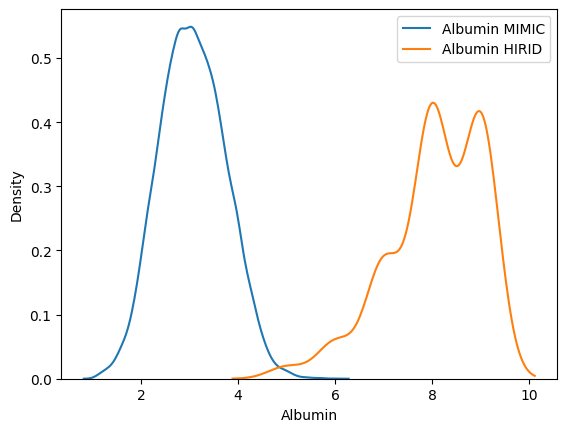

Bicarbonate


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MIMIC Mean = nan
HIRID Mean = nan


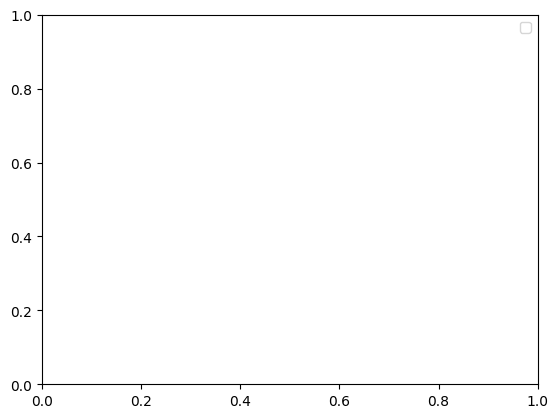

Calcium
MIMIC Mean = 8.291482530528832
HIRID Mean = 2.040093946626166


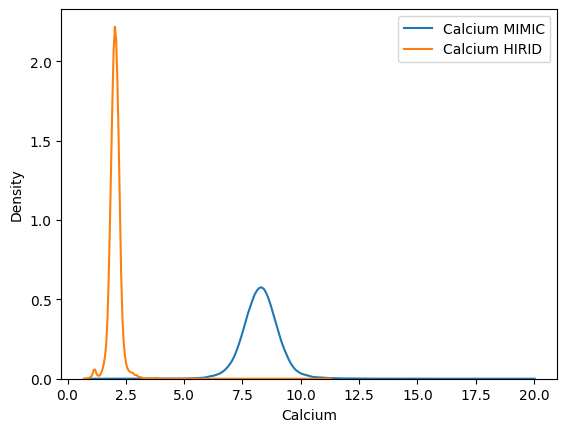

Chloride
MIMIC Mean = 105.12840985553818
HIRID Mean = 107.89449952763269


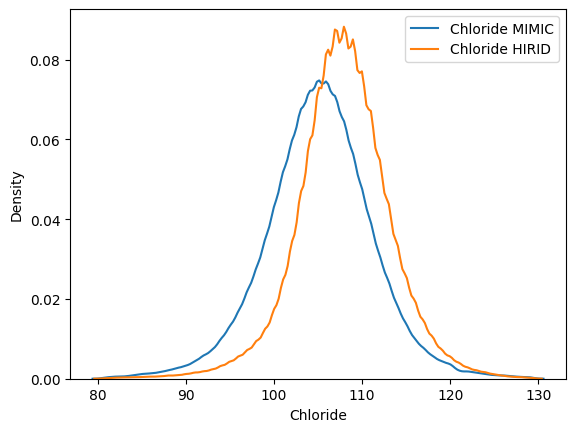

Temperature
Inhumane values missing for Temperature
MIMIC Mean = 36.99926151431942
HIRID Mean = 37.17525731695253


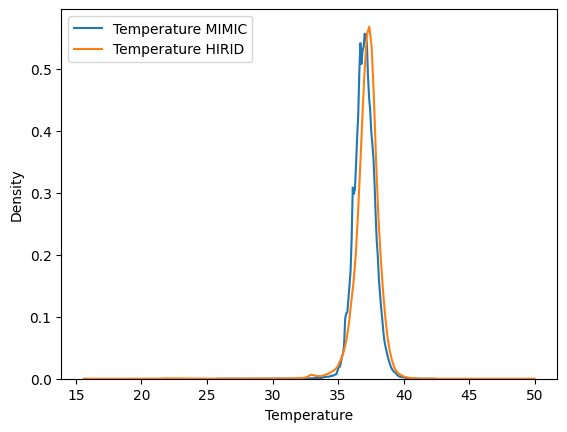

Creatinine
MIMIC Mean = 1.3849384275527759
HIRID Mean = 10.272727272727273


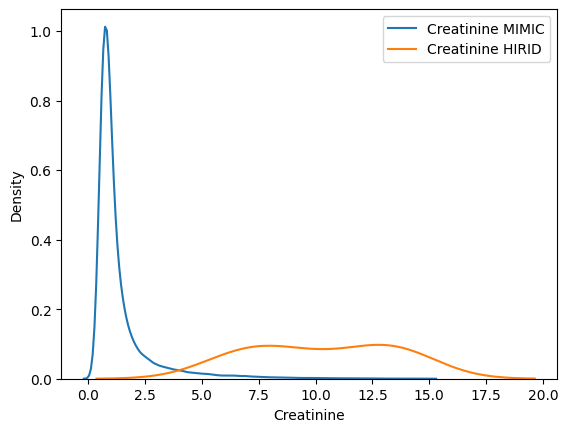

Diastolic blood pressure
Inhumane values missing for Diastolic blood pressure
MIMIC Mean = 61.11359229180254
HIRID Mean = 58.56367822090483


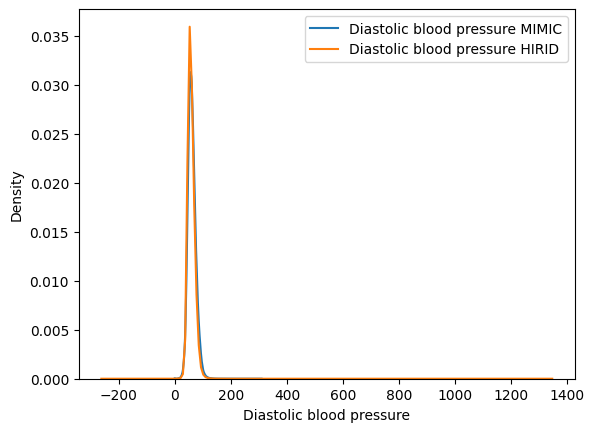

Glucose
MIMIC Mean = 141.1711855032892
HIRID Mean = 20.556412995804727


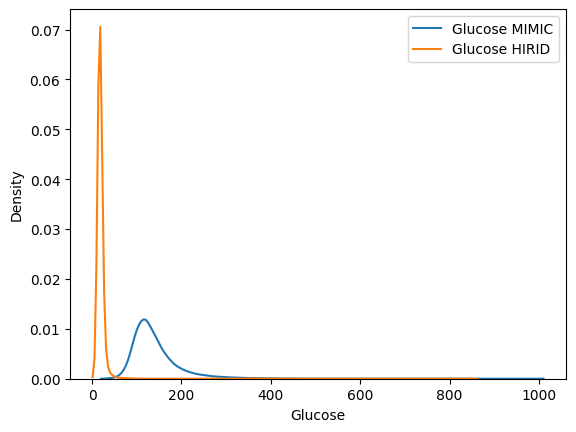

Heart Rate
Inhumane values missing for Heart Rate
MIMIC Mean = 85.31606175126937
HIRID Mean = 85.40726600038404


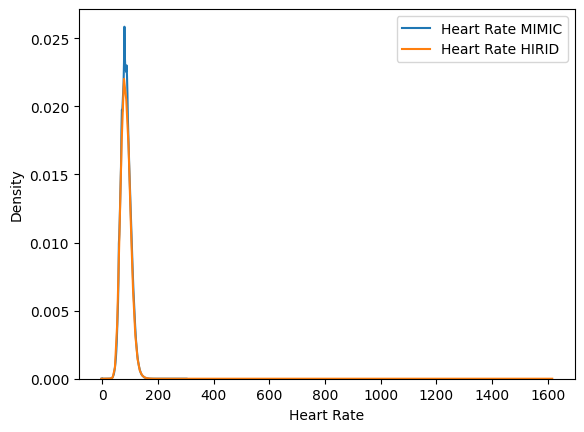

Hemoglobin
MIMIC Mean = 10.647270312651548
HIRID Mean = 17.0


/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_41600/4248842153.py:28: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=temp_filtered, x=lab2, label=f"{lab2} HIRID")


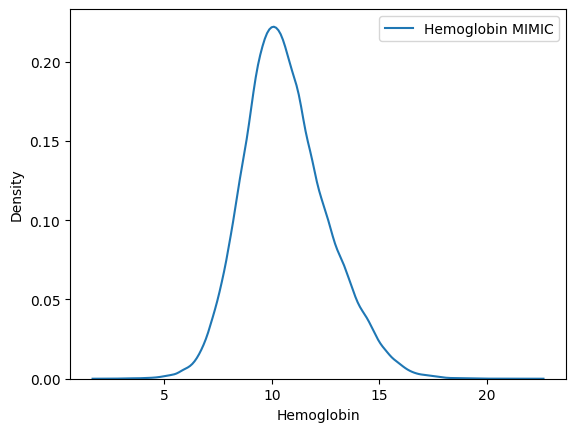

Prothrombin time INR
MIMIC Mean = 1.4393507594391408
HIRID Mean = 1.240620205268074


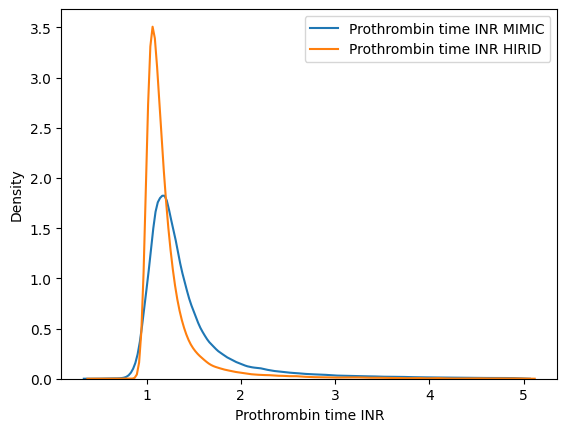

Lactic acid
Inhumane values missing for Lactic acid
MIMIC Mean = 2.7455232683194217
HIRID Mean = 1.9375818888301324


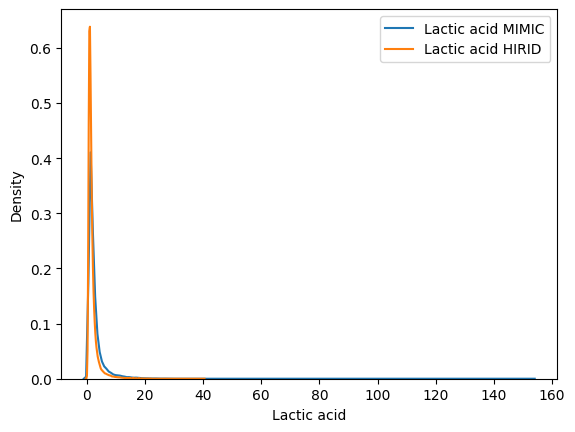

Lymphocytes
MIMIC Mean = 13.511912675286833
HIRID Mean = 0.18385518590998043


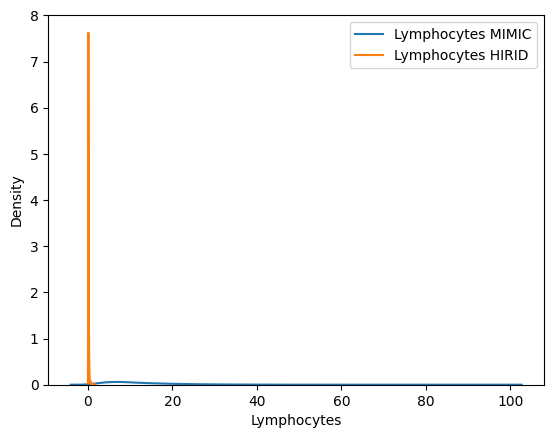

Magnesium
MIMIC Mean = 2.039457406430662
HIRID Mean = 0.8969793398406156


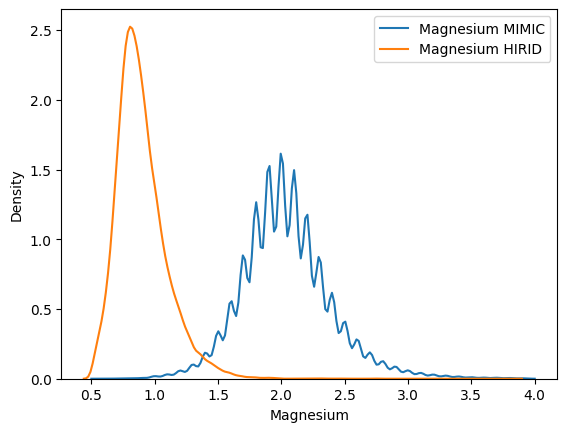

Neutrophils
MIMIC Mean = 77.99791328032335
HIRID Mean = 10.566800652931628


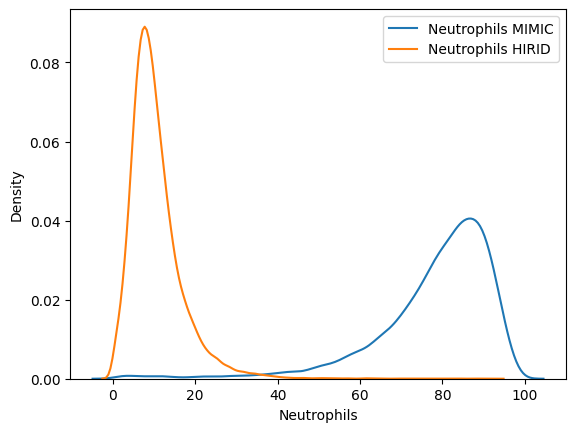

Oxygen saturation
Inhumane values missing for Oxygen saturation
MIMIC Mean = 96.68117692010404
HIRID Mean = 96.96259829454338


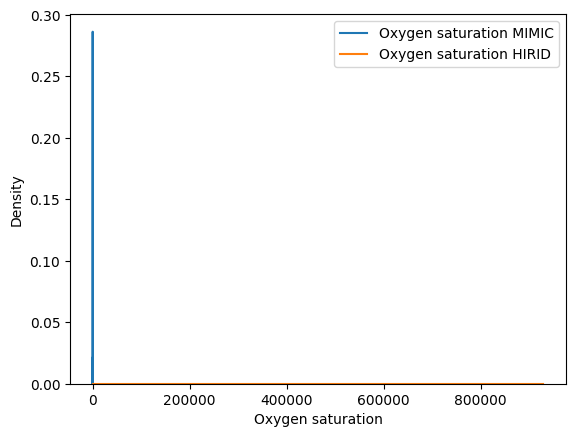

Platelets
MIMIC Mean = 203.5792843798713
HIRID Mean = 188.0689082531277


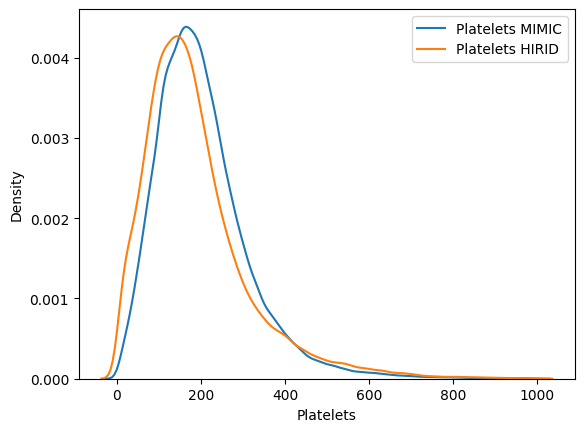

Potassium
MIMIC Mean = 4.162342254987468
HIRID Mean = 4.145318611399036


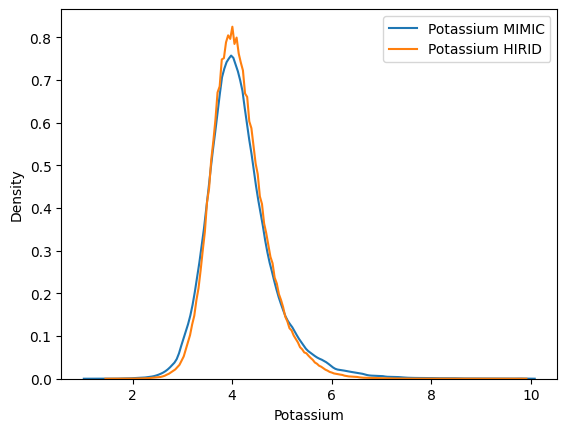

Respiratory rate
Inhumane values missing for Respiratory rate
MIMIC Mean = 18.968796364866186
HIRID Mean = 61.39900703518324


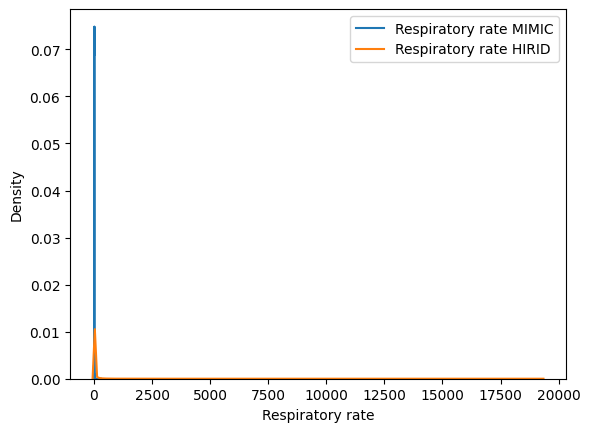

Sodium
MIMIC Mean = 138.52708144198667
HIRID Mean = 137.55264743477312


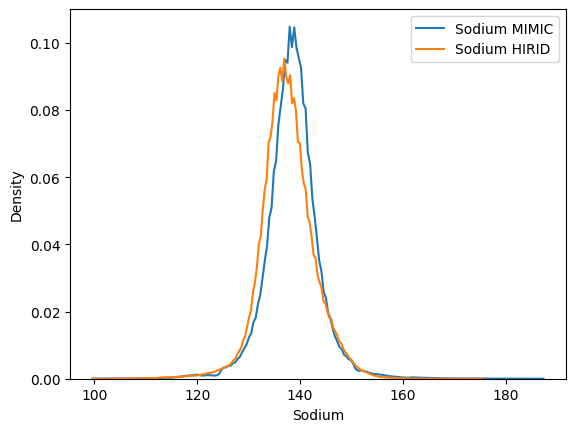

Systolic blood pressure
Inhumane values missing for Systolic blood pressure
MIMIC Mean = 122.04870372854569
HIRID Mean = 119.80637709020698


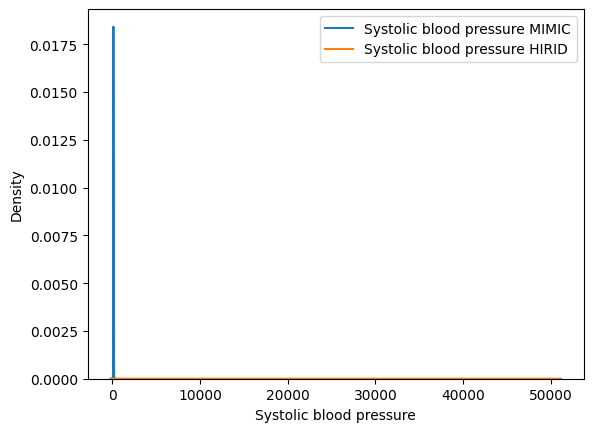

In [31]:
# Before unit corrections
for lab_name in lab_cols:
    print(lab_name)
    lab1 = lab_name
    lab2 = lab_name
    temp_filtered1 = mimic_m_extract.dropna(subset=[lab1])
    temp_filtered = hirid_m_extract.dropna(subset=[lab2])

    if lab_name in df_inhuman1.full_name.to_list():
        max_val = float(df_inhuman1[df_inhuman1.full_name == lab_name]['max_inhuman'].tolist()[0])
        min_val = float(df_inhuman1[df_inhuman1.full_name == lab_name]['min_inhuman'].tolist()[0])
        temp_filtered1 = temp_filtered1[(temp_filtered1[lab_name]<max_val) & (temp_filtered1[lab_name]>min_val)]
        temp_filtered = temp_filtered[(temp_filtered[lab_name]<max_val) & (temp_filtered[lab_name]>min_val)]
    elif lab_name=="Neutrophils":
        l = "Neurtrophils"
        max_val = float(df_inhuman1[df_inhuman1.full_name == l]['max_inhuman'].tolist()[0])
        min_val = float(df_inhuman1[df_inhuman1.full_name == l]['min_inhuman'].tolist()[0])
        temp_filtered1 = temp_filtered1[(temp_filtered1[lab_name]<max_val) & (temp_filtered1[lab_name]>min_val)]
        temp_filtered = temp_filtered[(temp_filtered[lab_name]<max_val) & (temp_filtered[lab_name]>min_val)]
    else:
        print(f"Inhumane values missing for {lab_name}")
    
    print(f"MIMIC Mean = {temp_filtered1[lab1].mean()}")
    print(f"HIRID Mean = {temp_filtered[lab2].mean()}")

    # print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
    sns.kdeplot(data=temp_filtered1, x=lab1, label=f"{lab1} MIMIC")
    sns.kdeplot(data=temp_filtered, x=lab2, label=f"{lab2} HIRID")
    plt.legend()
    plt.show()
    # plt.xlabel("Arterial pressure")
    # plt.xlim(0, 50)

In [32]:
lab_cols

['Albumin',
 'Bicarbonate',
 'Calcium',
 'Chloride',
 'Temperature',
 'Creatinine',
 'Diastolic blood pressure',
 'Glucose',
 'Heart Rate',
 'Hemoglobin',
 'Prothrombin time INR',
 'Lactic acid',
 'Lymphocytes',
 'Magnesium',
 'Neutrophils',
 'Oxygen saturation',
 'Platelets',
 'Potassium',
 'Respiratory rate',
 'Sodium',
 'Systolic blood pressure']

In [90]:
mimic_m_extract[mimic_m_extract.LOS>=pd.Timedelta(days=2)].to_csv(os.path.join(res, "MIMIC Extract Intersect Features.csv"))

In [ ]:
hirid_m_extract[hirid_m_extract.LOS>=pd.Timedelta(days=2)].to_csv(os.path.join(res, "HIRID Extract Intersect Features.csv"))

Albumin
MIMIC Mean = 3.0655902004454343
HIRID Mean = 0.8052631578947369


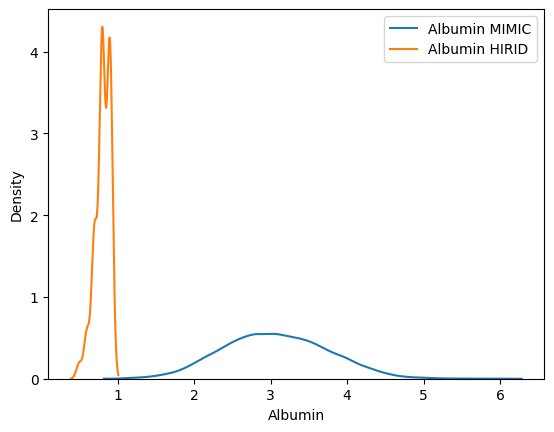

Bicarbonate


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MIMIC Mean = nan
HIRID Mean = nan


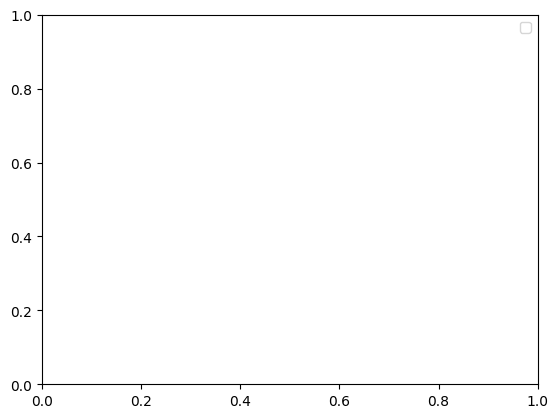

Calcium
MIMIC Mean = 8.291482530528832
HIRID Mean = 8.176696538077675


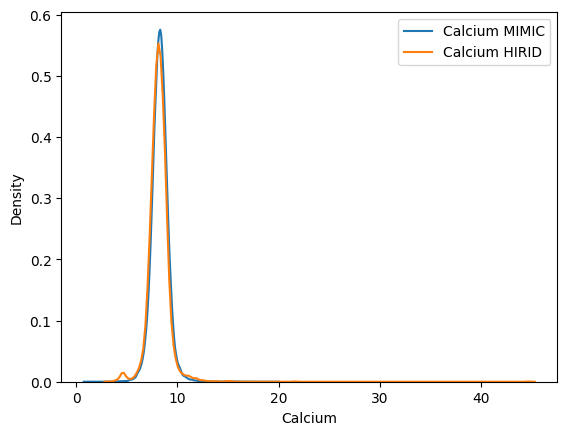

Chloride
MIMIC Mean = 105.12840985553818
HIRID Mean = 107.89449952763269


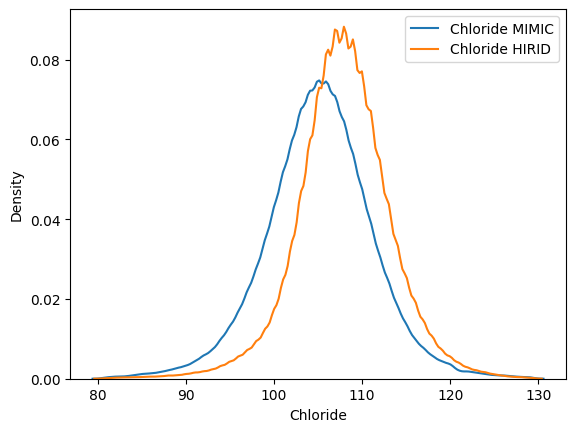

Temperature
Inhumane values missing for Temperature
MIMIC Mean = 36.99926151431942
HIRID Mean = 37.17525731695253


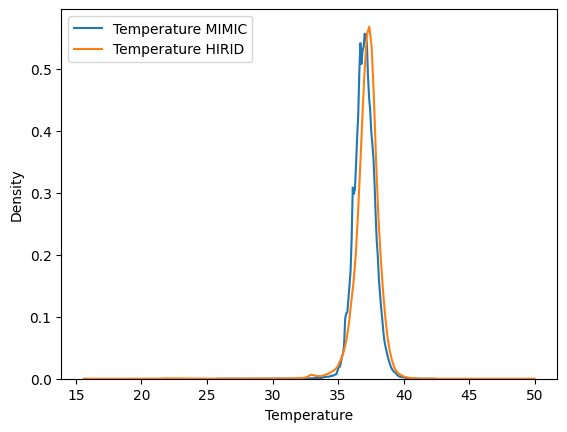

Creatinine
MIMIC Mean = 1.3849384275527759
HIRID Mean = 0.11618454545454546


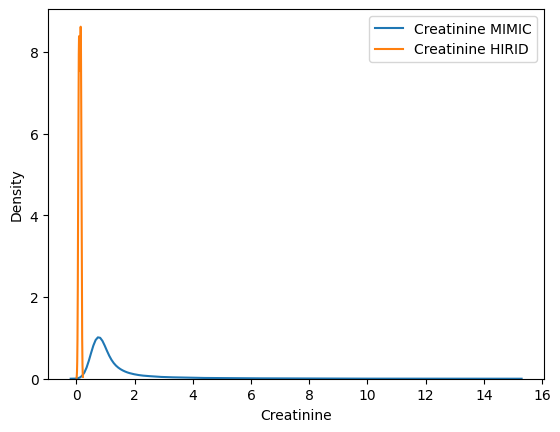

Diastolic blood pressure
Inhumane values missing for Diastolic blood pressure
MIMIC Mean = 61.11359229180254
HIRID Mean = 58.56367822090483


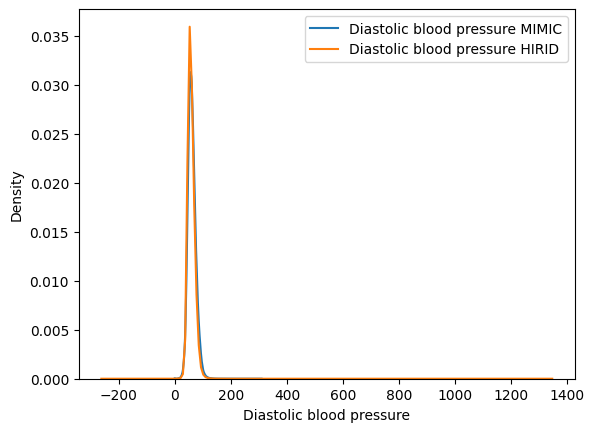

Glucose
MIMIC Mean = 141.1711855032892
HIRID Mean = 370.01543392448514


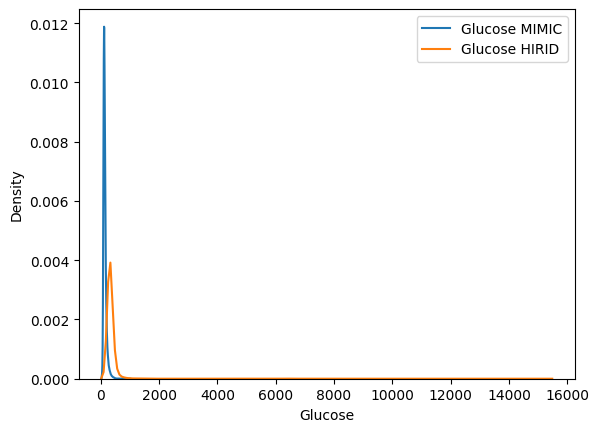

Heart Rate
Inhumane values missing for Heart Rate
MIMIC Mean = 85.31606175126937
HIRID Mean = 85.40726600038404


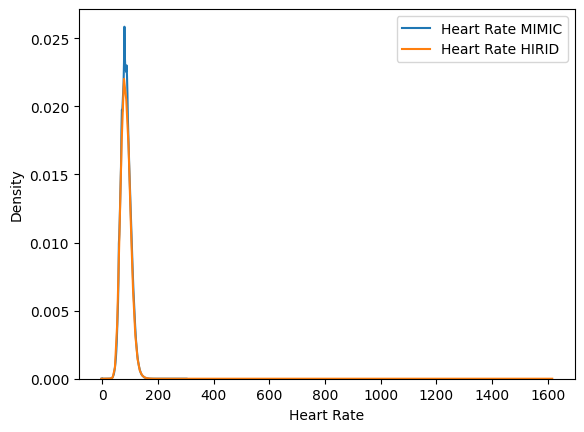

Hemoglobin
MIMIC Mean = 10.647270312651548
HIRID Mean = 1.7000000000000002


/var/folders/by/jbk3mn054mv4x7_28jxcwvx80000gn/T/ipykernel_41600/295226062.py:30: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=temp_filtered, x=lab2, label=f"{lab2} HIRID")


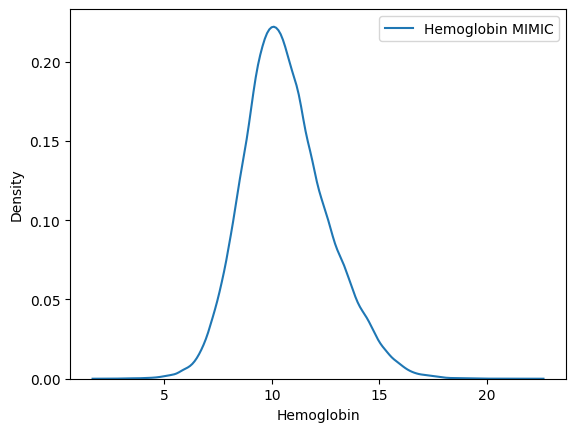

Prothrombin time INR
MIMIC Mean = 1.4393507594391408
HIRID Mean = 1.240620205268074


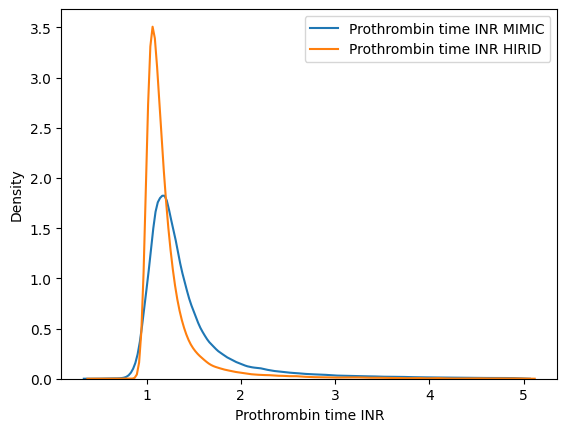

Lactic acid
Inhumane values missing for Lactic acid
MIMIC Mean = 2.7455232683194217
HIRID Mean = 1.9375818888301324


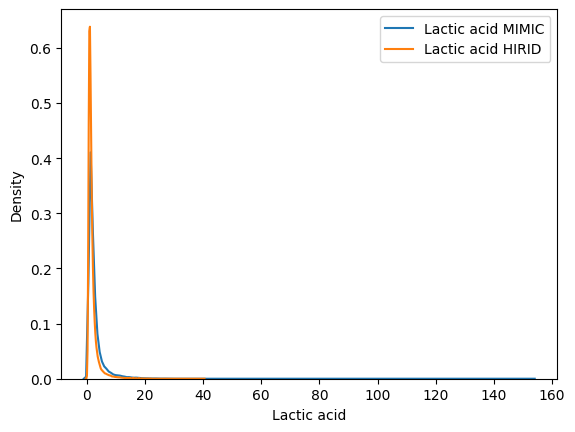

Lymphocytes
MIMIC Mean = 13.511912675286833
HIRID Mean = 0.18385518590998043


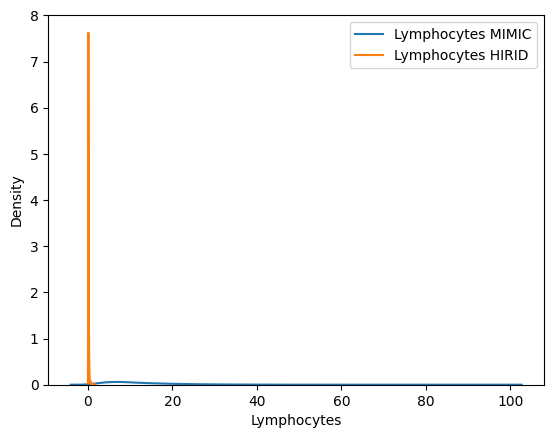

Magnesium
MIMIC Mean = 2.039457406430662
HIRID Mean = 0.368658508674493


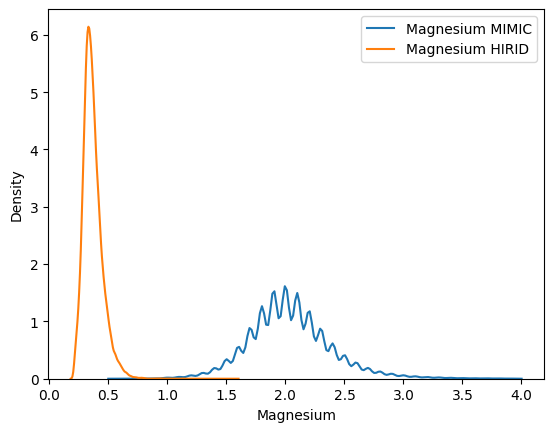

Neutrophils
MIMIC Mean = 77.99791328032335
HIRID Mean = 190.20241175276928


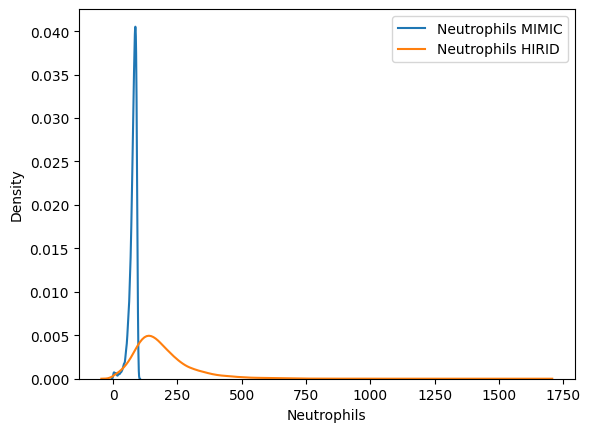

Oxygen saturation
Inhumane values missing for Oxygen saturation
MIMIC Mean = 96.68117692010404
HIRID Mean = 96.96259829454338


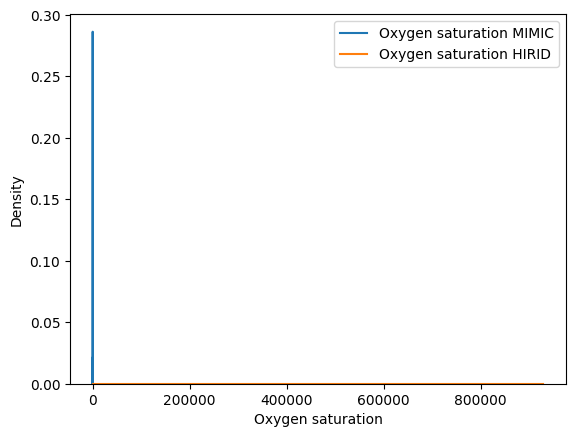

Platelets
MIMIC Mean = 203.5792843798713
HIRID Mean = 188.0689082531277


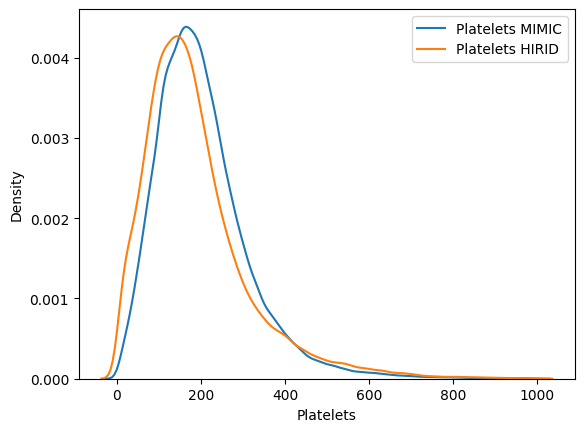

Potassium
MIMIC Mean = 4.162342254987468
HIRID Mean = 4.145318611399036


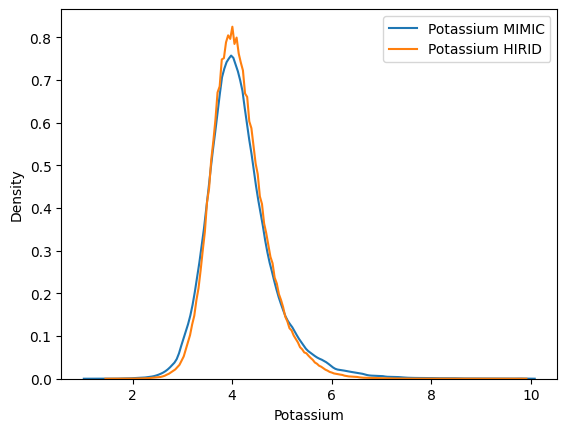

Respiratory rate
Inhumane values missing for Respiratory rate
MIMIC Mean = 18.968796364866186
HIRID Mean = 61.39900703518324


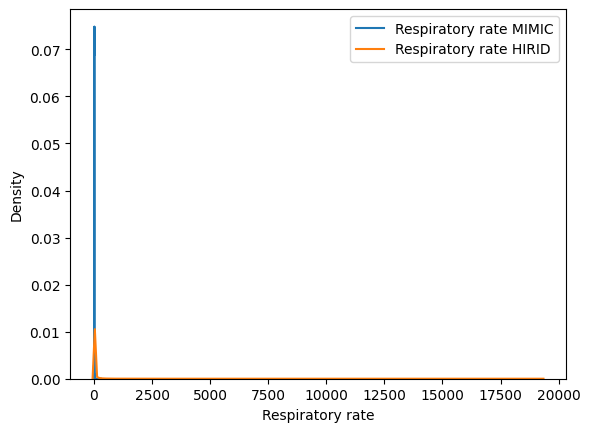

Sodium
MIMIC Mean = 138.52708144198667
HIRID Mean = 137.55264743477312


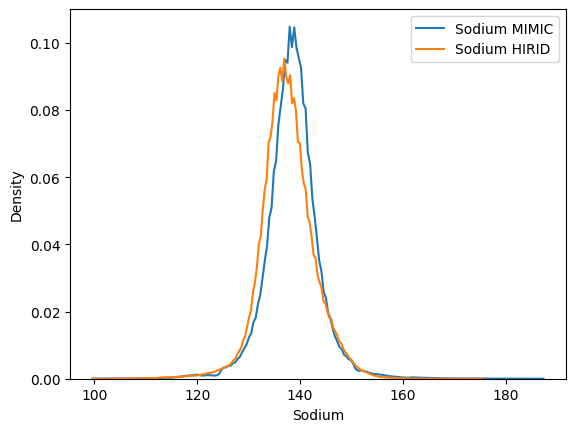

Systolic blood pressure
Inhumane values missing for Systolic blood pressure
MIMIC Mean = 122.04870372854569
HIRID Mean = 119.80637709020698


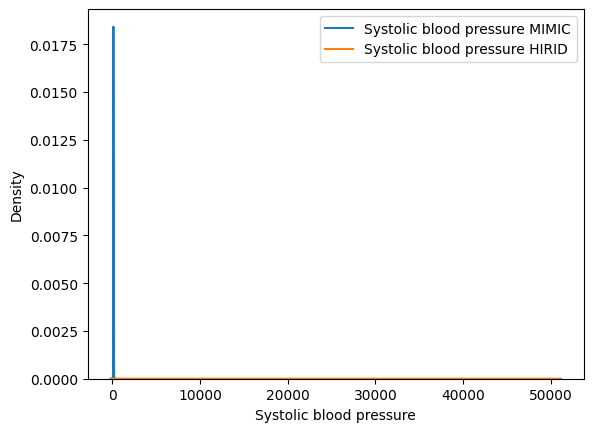

In [33]:
# After unit corrections
for lab_name in lab_cols:
    print(lab_name)
    lab1 = lab_name
    lab2 = lab_name
    temp_filtered1 = mimic_m_extract.dropna(subset=[lab1])
    temp_filtered = hirid_m_extract.dropna(subset=[lab2])

    if lab_name in df_inhuman1.full_name.to_list():
        max_val = float(df_inhuman1[df_inhuman1.full_name == lab_name]['max_inhuman'].tolist()[0])
        min_val = float(df_inhuman1[df_inhuman1.full_name == lab_name]['min_inhuman'].tolist()[0])
        temp_filtered1 = temp_filtered1[(temp_filtered1[lab_name]<max_val) & (temp_filtered1[lab_name]>min_val)]
        temp_filtered = temp_filtered[(temp_filtered[lab_name]<max_val) & (temp_filtered[lab_name]>min_val)]
        temp_filtered[lab2] = temp_filtered[lab2] * constants.HIRID_TO_MIMIC_CONV[lab_name][2]
    elif lab_name=="Neutrophils":
        l = "Neurtrophils"
        max_val = float(df_inhuman1[df_inhuman1.full_name == l]['max_inhuman'].tolist()[0])
        min_val = float(df_inhuman1[df_inhuman1.full_name == l]['min_inhuman'].tolist()[0])
        temp_filtered1 = temp_filtered1[(temp_filtered1[lab_name]<max_val) & (temp_filtered1[lab_name]>min_val)]
        temp_filtered = temp_filtered[(temp_filtered[lab_name]<max_val) & (temp_filtered[lab_name]>min_val)]
        temp_filtered[lab2] = temp_filtered[lab2] * constants.HIRID_TO_MIMIC_CONV[lab_name][2]
    else:
        print(f"Inhumane values missing for {lab_name}")
    
    print(f"MIMIC Mean = {temp_filtered1[lab1].mean()}")
    print(f"HIRID Mean = {temp_filtered[lab2].mean()}")

    # print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
    sns.kdeplot(data=temp_filtered1, x=lab1, label=f"{lab1} MIMIC")
    sns.kdeplot(data=temp_filtered, x=lab2, label=f"{lab2} HIRID")
    plt.legend()
    plt.show()
    # plt.xlabel("Arterial pressure")
    # plt.xlim(0, 50)

In [484]:
# hirid_mimic_feature_mapping = {
#     'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None, # Absent in MIMIC longitudanal data
#     'Albumin [Mass/volume] in Serum or Plasma' : None, # Large difference in mean. Units are different? 
#     'Amylase [Enzymatic activity/volume] in Serum or Plasma': None,  # Absent in MIMIC longitudanal data
#     'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma' : None,  # Absent in MIMIC longitudanal data
#     'Bicarbonate [Moles/volume] in Arterial blood':'Bicarbonate',
#     'Bilirubin.direct [Mass/volume] in Serum or Plasma': None,  # Absent in MIMIC longitudanal data
#     'Bilirubin.total [Moles/volume] in Serum or Plasma' : None, # Absent in MIMIC longitudanal data
#     'Calcium [Moles/volume] in Blood': None, # Large difference in mean. Units are different? 
#     'Calcium.ionized [Moles/volume] in Blood': None, # Large difference in mean. not same labtest or Units are different? 
#     'Carboxyhemoglobin/Hemoglobin.total in Arterial blood': None,  # Large difference in mean. Not same lab tests.
#     'Chloride [Moles/volume] in Blood': 'Chloride', 
#     'Core body temperature': 'Temperature',
#     'Creatinine [Moles/volume] in Blood': None,  # Large difference in mean. Units are different? 
#     'Diastolic arterial pressure': 'Diastolic blood pressure',
#     'Glucose [Moles/volume] in Serum or Plasma': None, # Large difference in mean. Units are different? 
#     'Heart rate': 'Heart Rate',
#     'Hemoglobin [Mass/volume] in blood': None,   # Large difference in mean. Units are different? 
#     'INR in Blood by Coagulation assay': 'Prothrombin time INR', 
#     'Lactate [Mass/volume] in blood': 'Lactic acid',
#     'Lymphocytes [#/volume] in Blood': 'Lymphocytes', 
#     'Magnesium [Moles/volume] in Blood': 'Magnesium',
#     'Methemoglobin/Hemoglobin.total in Arterial blood': None,  # Large difference in mean. Not same lab tests.
#     'Neutrophils/100 leukocytes in Blood': None,  # Large difference in mean. Units are different? 
#     'Peripheral oxygen saturation': 'Oxygen saturation',  
#     'Platelets [#/volume] in Blood': 'Platelets', 
#     'Potassium [Moles/volume] in Blood': 'Potassium',
#     'Pulmonary artery diastolic pressure': None,  # Absent in MIMIC longitudanal data
#     'Pulmonary artery systolic pressure': None, # Absent in MIMIC longitudanal data
#     'Respiratory rate': 'Respiratory rate',
#     'Sodium [Moles/volume] in Blood': 'Sodium', 
#     'Systolic arterial pressure': 'Systolic blood pressure'
# }

In [8]:
mimic_labs = ['Heart Rate',
'Respiratory rate', 'Oxygen saturation', 'Systolic blood pressure',
'Diastolic blood pressure', 'Temperature', 'Glucose', 'Potassium',
'Sodium', 'Chloride', 'Creatinine', 'Blood urea nitrogen',
'Bicarbonate', 'Calcium', 'Albumin', 'Lactate dehydrogenase',
'Magnesium', 'Lactic acid', 'Hematocrit', 'Hemoglobin', 'Platelets',
'White blood cell count', 'Red blood cell', 'Mean corpuscular volume',
'Lymphocytes', 'Neutrophils', 'Prothrombin time INR']

In [9]:
set(mimic_labs).difference(hirid_mimic_mapping.values())

{'Blood urea nitrogen',
 'Hematocrit',
 'Lactate dehydrogenase',
 'Mean corpuscular volume',
 'Red blood cell',
 'White blood cell count'}

In [12]:
ref = hirid_parser.h_var_ref

#### Lactate

In [600]:
lab_mimic = 'Lactate dehydrogenase'
lab_hirid = 'Lactate [Mass/volume] in blood'

In [602]:
df_inhuman1 = df_inhuman.dropna(subset=["full_name"])

In [ ]:
df_inhuman1[df_inhuman1.full_name]

In [601]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit


In [ ]:
ref[ref["Variable Name"]==lab_hirid]

,Source Table,variableid,Variable Name,Unit,Additional information
119,Observation,20005110,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN
120,Observation,24000523,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN
121,Observation,24000585,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN


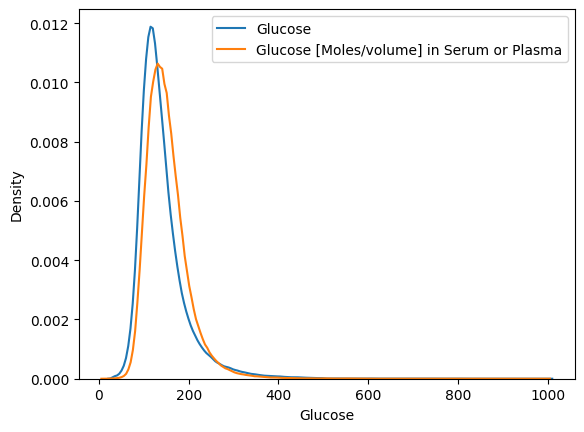

In [ ]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = lab_mimic
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = lab_hirid
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 18

max_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['max_inhuman'].tolist()[0])
min_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['min_inhuman'].tolist()[0])
temp_filtered1 = temp_filtered1[(temp_filtered1[lab_mimic]<max_val) & (temp_filtered1[lab_mimic]>min_val)]
temp_filtered = temp_filtered[(temp_filtered[lab_hirid]<max_val) & (temp_filtered[lab_hirid]>min_val)]

# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
# plt.xlim(0, 50)

In [ ]:
temp_filtered1.describe()

,subject_id,icustay_id,hadm_id,age,LOS,Mortality,LABEL_48,Glucose
count,485632.000000,485632.000000,485632.000000,485632.000000,485632,485632.000000,485632.000000,485632.000000
mean,39163.365760,250374.814623,150159.827165,64.192054,10 days 16:19:59.663572417,0.116662,0.011795,141.171186
std,29369.120478,28877.222563,28892.334119,15.275402,9 days 03:00:16.901387467,0.321018,0.107962,57.464955
min,3.000000,200003.000000,100001.000000,20.000000,0 days 07:34:00,0.000000,0.000000,33.000000
25%,14629.000000,225521.000000,125078.000000,54.760000,5 days 18:14:00,0.000000,0.000000,107.000000
50%,28897.000000,250501.000000,150191.000000,66.070000,8 days 12:36:00,0.000000,0.000000,128.000000
75%,64160.000000,275455.000000,175445.000000,76.430000,12 days 16:54:00,0.000000,0.000000,159.000000
max,99999.000000,299999.000000,199999.000000,89.060000,206 days 10:13:00,1.000000,1.000000,997.500000


In [ ]:
temp_filtered.describe()

,HADM_ID,AGE,HOUR,LABEL_48,Glucose [Moles/volume] in Serum or Plasma
count,397310.000000,397310.000000,397310.000000,397310.000000,397310.000000
mean,16802.873351,64.615489,11.127233,0.031270,151.599082
std,9750.051529,10.812099,6.999388,0.174048,48.327663
min,1.000000,40.000000,0.000000,0.000000,16.200000
25%,8210.000000,55.000000,5.000000,0.000000,120.600000
50%,16804.000000,65.000000,11.000000,0.000000,144.000000
75%,25145.000000,75.000000,18.000000,0.000000,172.800000
max,33905.000000,80.000000,23.000000,1.000000,993.960000


#### Neutrophils

In [579]:
lab_mimic = 'Neutrophils'
lab_hirid = 'Neutrophils/100 leukocytes in Blood'

In [585]:
df_inhuman1 = df_inhuman.dropna(subset=["full_name"])

In [102]:
df_inhuman1[df_inhuman1.full_name=="df_inhuman1[df_inhuman1.full_name=="Neutrophils"]"]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit


In [588]:
df_inhuman1[df_inhuman1.full_name.str.startswith("N")]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
32,NEUT.abs,neut_abs,NEU,neut_abs,neut_abs,complete_blood_count,Neurtrophils count,1.4,6,0.1,10,10e3/µL
33,NEUT.,neut_per_30200_0,NEU_precent,neut_per,NEUTRIO,complete_blood_count,Neurtrophils,40,75,0.1,99,%


In [580]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit


In [589]:
ref[ref["Variable Name"]==lab_hirid]

,Source Table,variableid,Variable Name,Unit,Additional information
126,Observation,24000550,Neutrophils/100 leukocytes in Blood,%,NaN


(0.0, 200.0)

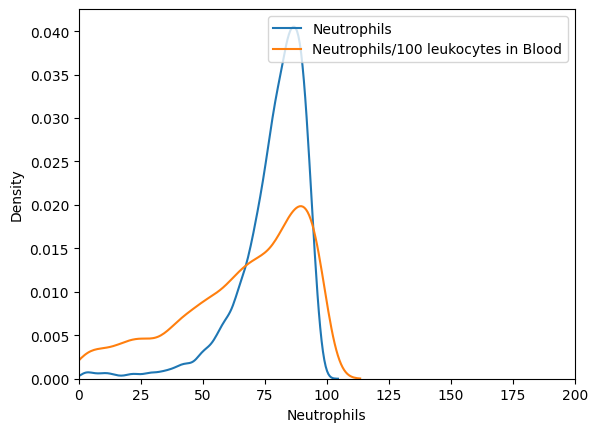

In [595]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = lab_mimic
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = lab_hirid
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 18

max_val = float(df_inhuman[df_inhuman.full_name == "Neurtrophils"]['max_inhuman'].tolist()[0])
min_val = float(df_inhuman[df_inhuman.full_name == "Neurtrophils"]['min_inhuman'].tolist()[0])
temp_filtered1 = temp_filtered1[(temp_filtered1[lab_mimic]<max_val) & (temp_filtered1[lab_mimic]>min_val)]
temp_filtered = temp_filtered[(temp_filtered[lab_hirid]<max_val) & (temp_filtered[lab_hirid]>min_val)]

# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
plt.xlim(0, 200)

In [593]:
temp_filtered1.describe()

,subject_id,icustay_id,hadm_id,age,LOS,Mortality,LABEL_48,Neutrophils
count,22773.000000,22773.000000,22773.000000,22773.000000,22773,22773.000000,22773.000000,22773.000000
mean,42304.529487,250340.420454,149909.219251,63.120912,9 days 16:12:11.806086154,0.156765,0.029640,78.007180
std,29815.686448,28849.243317,28917.856566,16.639220,9 days 20:33:48.681331827,0.363587,0.169597,14.638142
min,3.000000,200003.000000,100001.000000,20.000000,0 days 07:34:00,0.000000,0.000000,1.000000
25%,16469.000000,225696.000000,124867.000000,51.920000,4 days 07:56:00,0.000000,0.000000,72.500000
50%,31692.000000,250587.000000,149865.000000,64.880000,7 days 03:19:00,0.000000,0.000000,81.500000
75%,68176.000000,275420.000000,175031.000000,77.260000,11 days 14:53:00,0.000000,0.000000,88.000000
max,99992.000000,299998.000000,199999.000000,89.060000,206 days 10:13:00,1.000000,1.000000,100.000000


In [594]:
temp_filtered.describe()

,HADM_ID,AGE,HOUR,LABEL_48,Neutrophils/100 leukocytes in Blood
count,23998.000000,23998.000000,23998.000000,23998.000000,23998.000000
mean,16785.955121,63.695725,7.066422,0.034045,190.187149
std,9753.364805,11.108736,3.592311,0.181347,124.824949
min,2.000000,40.000000,0.000000,0.000000,0.000000
25%,8229.000000,55.000000,6.000000,0.000000,115.380000
50%,16836.000000,65.000000,6.000000,0.000000,165.780000
75%,25194.750000,75.000000,6.000000,0.000000,234.720000
max,33905.000000,80.000000,23.000000,1.000000,4126.500000


#### Glucose

In [566]:
lab_mimic = 'Glucose'
lab_hirid = 'Glucose [Moles/volume] in Serum or Plasma'

In [567]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
70,GLUCOSE,glucose_30740_0,Glucose_blood,glucose,GLUCOSE_A,metabolic_panel,Glucose,70,110,15,1000,mg/dL


In [568]:
ref[ref["Variable Name"]==lab_hirid]

,Source Table,variableid,Variable Name,Unit,Additional information
119,Observation,20005110,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN
120,Observation,24000523,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN
121,Observation,24000585,Glucose [Moles/volume] in Serum or Plasma,mmol/l,NaN


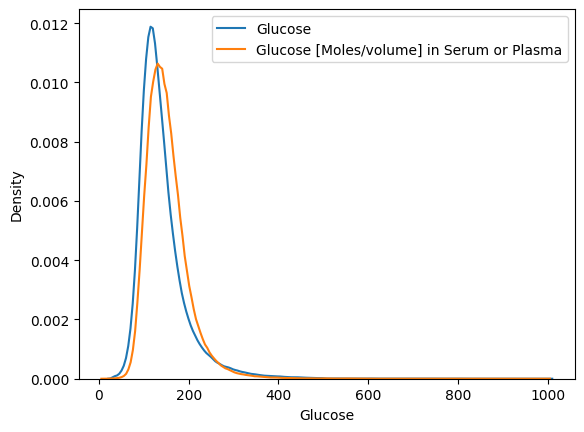

In [578]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = lab_mimic
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = lab_hirid
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 18

max_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['max_inhuman'].tolist()[0])
min_val = float(df_inhuman[df_inhuman.full_name == lab_mimic]['min_inhuman'].tolist()[0])
temp_filtered1 = temp_filtered1[(temp_filtered1[lab_mimic]<max_val) & (temp_filtered1[lab_mimic]>min_val)]
temp_filtered = temp_filtered[(temp_filtered[lab_hirid]<max_val) & (temp_filtered[lab_hirid]>min_val)]

# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
# plt.xlim(0, 50)

In [576]:
temp_filtered1.describe()

,subject_id,icustay_id,hadm_id,age,LOS,Mortality,LABEL_48,Glucose
count,485632.000000,485632.000000,485632.000000,485632.000000,485632,485632.000000,485632.000000,485632.000000
mean,39163.365760,250374.814623,150159.827165,64.192054,10 days 16:19:59.663572417,0.116662,0.011795,141.171186
std,29369.120478,28877.222563,28892.334119,15.275402,9 days 03:00:16.901387467,0.321018,0.107962,57.464955
min,3.000000,200003.000000,100001.000000,20.000000,0 days 07:34:00,0.000000,0.000000,33.000000
25%,14629.000000,225521.000000,125078.000000,54.760000,5 days 18:14:00,0.000000,0.000000,107.000000
50%,28897.000000,250501.000000,150191.000000,66.070000,8 days 12:36:00,0.000000,0.000000,128.000000
75%,64160.000000,275455.000000,175445.000000,76.430000,12 days 16:54:00,0.000000,0.000000,159.000000
max,99999.000000,299999.000000,199999.000000,89.060000,206 days 10:13:00,1.000000,1.000000,997.500000


In [577]:
temp_filtered.describe()

,HADM_ID,AGE,HOUR,LABEL_48,Glucose [Moles/volume] in Serum or Plasma
count,397310.000000,397310.000000,397310.000000,397310.000000,397310.000000
mean,16802.873351,64.615489,11.127233,0.031270,151.599082
std,9750.051529,10.812099,6.999388,0.174048,48.327663
min,1.000000,40.000000,0.000000,0.000000,16.200000
25%,8210.000000,55.000000,5.000000,0.000000,120.600000
50%,16804.000000,65.000000,11.000000,0.000000,144.000000
75%,25145.000000,75.000000,18.000000,0.000000,172.800000
max,33905.000000,80.000000,23.000000,1.000000,993.960000


#### Creatinine

In [561]:
lab_mimic = 'Creatinine'
lab_hirid = 'Creatinine [Moles/volume] in Blood'

In [562]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
68,CREATININE,creatinine_30700_0,Creatinin_blood,creatinine,CREA,metabolic_panel,Creatinine,0.6,1.3,0.1,15,mg/dL


In [563]:
ref[ref["Variable Name"]==lab_hirid]

,Source Table,variableid,Variable Name,Unit,Additional information
100,Observation,20000600,Creatinine [Moles/volume] in Blood,umol/l,NaN


In [564]:
1/88.42

0.011309658448314861

(0.0, 50.0)

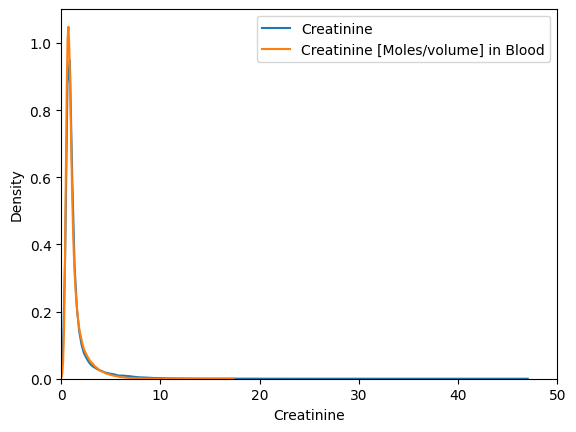

In [565]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = lab_mimic
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = lab_hirid
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 0.01131
# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
plt.xlim(0, 50)

#### Hemoglobin

In [542]:
hirid_extract.columns

Index(['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR',
       'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Albumin [Mass/volume] in Serum or Plasma',
       'Amylase [Enzymatic activity/volume] in Serum or Plasma',
       'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Bicarbonate [Moles/volume] in Arterial blood',
       'Bilirubin.direct [Mass/volume] in Serum or Plasma',
       'Bilirubin.total [Moles/volume] in Serum or Plasma',
       'Calcium [Moles/volume] in Blood',
       'Calcium.ionized [Moles/volume] in Blood',
       'Carboxyhemoglobin/Hemoglobin.total in Arterial blood',
       'Chloride [Moles/volume] in Blood', 'Core body temperature',
       'Creatinine [Moles/volume] in Blood', 'Diastolic arterial pressure',
       'Glucose [Moles/volume] in Serum or Plasma', 'Heart rate',
       'Hemoglobin [Mass/volume] in blood',
       'INR in Blood by Coagulation assay', 'Lactate [Mass/volume] in blood',
     

In [554]:
lab_mimic = 'Hemoglobin'
lab_hirid = ['Carboxyhemoglobin/Hemoglobin.total in Arterial blood', ('Hemoglobin [Mass/volume] in Blood','Hemoglobin [Mass/volume] in blood'), 'Methemoglobin/Hemoglobin.total in Arterial blood']

In [555]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
23,HGB,hgb_30020_0,HGB,hgb,HGB,complete_blood_count,Hemoglobin,11.7,17.2,2,25,g/dL


In [556]:
ref[ref["Variable Name"]==lab_hirid[0]]

,Source Table,variableid,Variable Name,Unit,Additional information
66,Observation,24000526,Carboxyhemoglobin/Hemoglobin.total in Arterial...,%,NaN


In [557]:
ref[ref["Variable Name"]==lab_hirid[1][0]]

,Source Table,variableid,Variable Name,Unit,Additional information
130,Observation,20000900,Hemoglobin [Mass/volume] in Blood,g/l,NaN
131,Observation,24000836,Hemoglobin [Mass/volume] in Blood,g/l,NaN


In [558]:
ref[ref["Variable Name"]==lab_hirid[2]]

,Source Table,variableid,Variable Name,Unit,Additional information
70,Observation,24000549,Methemoglobin/Hemoglobin.total in Arterial blood,%,NaN


(0.0, 50.0)

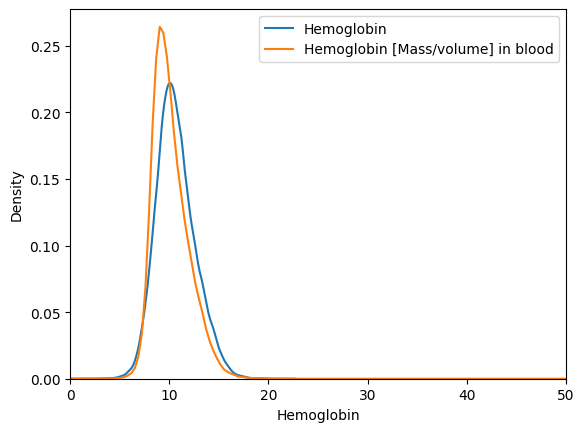

In [560]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = lab_mimic
lab2 = lab_hirid[1][1]
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 0.1
# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
plt.xlim(0, 50)

#### Calicium

In [522]:
lab_mimic = 'Calcium'
lab_hirid = 'Calcium [Moles/volume] in Blood'

In [523]:
df_inhuman[df_inhuman["full_name"]==lab_mimic]

,belinson,ukb,tamsc,parsed_name,sheba,measurement_type,full_name,min_range,max_range,min_inhuman,max_inhuman,unit
65,CALCIUM,calcium_30680_0,Calcium_total_blood,calcium,CA,metabolic_panel,Calcium,8.5,10.5,0.1,20,mg/dL


In [524]:
ref[ref["Variable Name"]==lab_hirid]

,Source Table,variableid,Variable Name,Unit,Additional information
96,Observation,20005100,Calcium [Moles/volume] in Blood,mmol/l,NaN


In [525]:
1/0.2495

4.008016032064128

(0.0, 50.0)

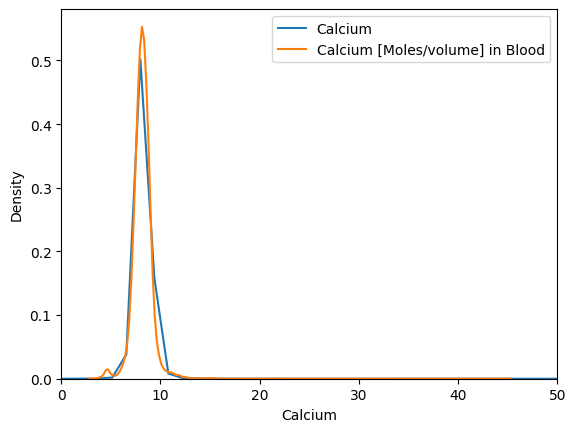

In [531]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = 'Calcium'
# lab2 = 'Calcium.ionized [Moles/volume] in Blood'
lab2 = 'Calcium [Moles/volume] in Blood'
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 4.008
# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
plt.xlim(0, 50)

(0.0, 50.0)

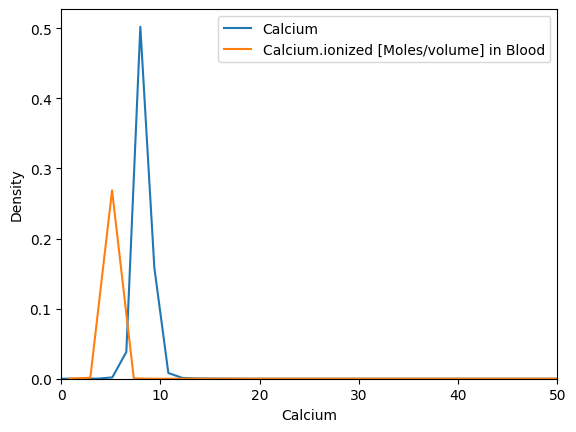

In [532]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
lab1 = 'Calcium'
lab2 = 'Calcium.ionized [Moles/volume] in Blood'
# lab2 = 'Calcium [Moles/volume] in Blood'
temp_filtered1 = mimic_extract[['charttime', 'subject_id', 'icustay_id', 'hadm_id','DEATHTIME', 'DISCHTIME', 'ADMITTIME', 'ETHNICITY', 'GENDER', 'age', 'LOS', 'Mortality', 'LABEL_48', lab1 ]].dropna(subset=[lab1])
temp_filtered = hirid_extract[['HADM_ID', 'AGE', 'GENDER', 'DATE', 'HOUR', 'EST_DISCHTIME', 'CHARTTIME', 'discharge_status', 'LABEL_48', lab2]].dropna(subset=lab2)
temp_filtered[lab2] = temp_filtered[lab2] * 4.008
# print(stats.ttest_rel(temp_filtered[lab1], temp_filtered[lab2]))
sns.kdeplot(data=temp_filtered1, x=lab1, label=lab1)
sns.kdeplot(data=temp_filtered, x=lab2, label=lab2)
plt.legend()
# plt.xlabel("Arterial pressure")
plt.xlim(0, 50)